Problem Statement:



In [190]:
import math as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom,geom
import math
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import poisson,binom,expon

In [191]:
from scipy.stats import chi2 # Distribution (cdf etc.)
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency # Categorical Vs Categorical
from scipy.stats import ttest_rel,ttest_1samp,ttest_ind
from scipy.stats import binom,t
import scipy.stats as stats

In [192]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [193]:
df = pd.read_csv("/content/sample_data/Delhivery.csv")

In [194]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51866,training,2018-09-18 04:32:21.900842,thanos::sroute:14c55592-ba2e-4f72-820c-3a22334...,FTL,trip-153724514190061713,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-19 20:42:13.070876,...,2018-09-20 05:37:33,352.841215,693.0,433.0,464.7654,1.600462,33.0,30.0,24.2288,1.100000
51867,training,2018-09-18 04:32:21.900842,thanos::sroute:14c55592-ba2e-4f72-820c-3a22334...,FTL,trip-153724514190061713,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-19 20:42:13.070876,...,2018-09-20 05:13:28,375.771886,717.0,465.0,489.7881,1.541935,24.0,31.0,25.0227,0.774194
51868,training,2018-09-18 04:32:21.900842,thanos::sroute:14c55592-ba2e-4f72-820c-3a22334...,FTL,trip-153724514190061713,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-19 20:42:13.070876,...,2018-09-20 04:41:27,397.553882,749.0,494.0,576.0040,1.516194,32.0,40.0,32.4948,0.800000
51869,training,2018-09-18 04:32:21.900842,thanos::sroute:14c55592-ba2e-4f72-820c-3a22334...,FTL,trip-153724514190061713,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-19 20:42:13.070876,...,2018-09-20 04:03:33,418.230783,787.0,471.0,558.2444,1.670913,37.0,33.0,31.6131,1.121212


# **EDA: Exploratory Data Analysis **

In [195]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


 **Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.**

In [196]:
df.shape

(51871, 24)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51871 entries, 0 to 51870
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            51871 non-null  object 
 1   trip_creation_time              51871 non-null  object 
 2   route_schedule_uuid             51871 non-null  object 
 3   route_type                      51871 non-null  object 
 4   trip_uuid                       51871 non-null  object 
 5   source_center                   51871 non-null  object 
 6   source_name                     51741 non-null  object 
 7   destination_center              51871 non-null  object 
 8   destination_name                51786 non-null  object 
 9   od_start_time                   51871 non-null  object 
 10  od_end_time                     51871 non-null  object 
 11  start_scan_to_end_scan          51871 non-null  float64
 12  is_cutoff                       

In [198]:
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       130
destination_center                  0
destination_name                   85
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         1
osrm_time                           1
osrm_distance                       1
factor                              1
segment_actual_time                 1
segment_osrm_time                   1
segment_osrm_distance               1
segment_factor                      1
dtype: int64

Dropping null values from the columns source_name and destination_name since the vno of null values are too low hence insignificant on the data

In [199]:
df.dropna(subset='source_name', inplace=True)
df.dropna(subset='destination_name', inplace=True)

In [200]:
df.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       1
osrm_time                         1
osrm_distance                     1
factor                            1
segment_actual_time               1
segment_osrm_time                 1
segment_osrm_distance             1
segment_factor                    1
dtype: int64

In [201]:
df.nunique()

data                                  2
trip_creation_time                 5301
route_schedule_uuid                1282
route_type                            2
trip_uuid                          5301
source_center                      1326
source_name                        1326
destination_center                 1288
destination_name                   1288
od_start_time                      9402
od_end_time                        9402
start_scan_to_end_scan             1271
is_cutoff                             2
cutoff_factor                       437
cutoff_timestamp                  41713
actual_distance_to_destination    51548
actual_time                        2806
osrm_time                          1444
osrm_distance                     50526
factor                            21163
segment_actual_time                 470
segment_osrm_time                   157
segment_osrm_distance             46752
segment_factor                     3502
dtype: int64

Cnverting columns to datetime from Object datatype for further use in the case study

In [202]:
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

In [203]:
df["trip_creation_time"].dt.month_name().value_counts()

September    45232
October       6424
Name: trip_creation_time, dtype: int64

In [204]:
df["trip_creation_time"].dt.year.value_counts()

2018    51656
Name: trip_creation_time, dtype: int64

In [205]:
df["trip_creation_time"].dt.day_name().value_counts()

Wednesday    9542
Friday       7657
Monday       7423
Thursday     7109
Tuesday      6795
Sunday       6583
Saturday     6547
Name: trip_creation_time, dtype: int64

In [206]:
df.nunique()

data                                  2
trip_creation_time                 5301
route_schedule_uuid                1282
route_type                            2
trip_uuid                          5301
source_center                      1326
source_name                        1326
destination_center                 1288
destination_name                   1288
od_start_time                      9402
od_end_time                        9402
start_scan_to_end_scan             1271
is_cutoff                             2
cutoff_factor                       437
cutoff_timestamp                  41713
actual_distance_to_destination    51548
actual_time                        2806
osrm_time                          1444
osrm_distance                     50526
factor                            21163
segment_actual_time                 470
segment_osrm_time                   157
segment_osrm_distance             46752
segment_factor                     3502
dtype: int64

# **Visual Analysis**

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51656 entries, 0 to 51870
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            51656 non-null  object        
 1   trip_creation_time              51656 non-null  datetime64[ns]
 2   route_schedule_uuid             51656 non-null  object        
 3   route_type                      51656 non-null  object        
 4   trip_uuid                       51656 non-null  object        
 5   source_center                   51656 non-null  object        
 6   source_name                     51656 non-null  object        
 7   destination_center              51656 non-null  object        
 8   destination_name                51656 non-null  object        
 9   od_start_time                   51656 non-null  datetime64[ns]
 10  od_end_time                     51656 non-null  datetime64[ns]
 11  st

Creating histplots for numerical columns to check the distributions for them

In [208]:
len(colums_List)

12

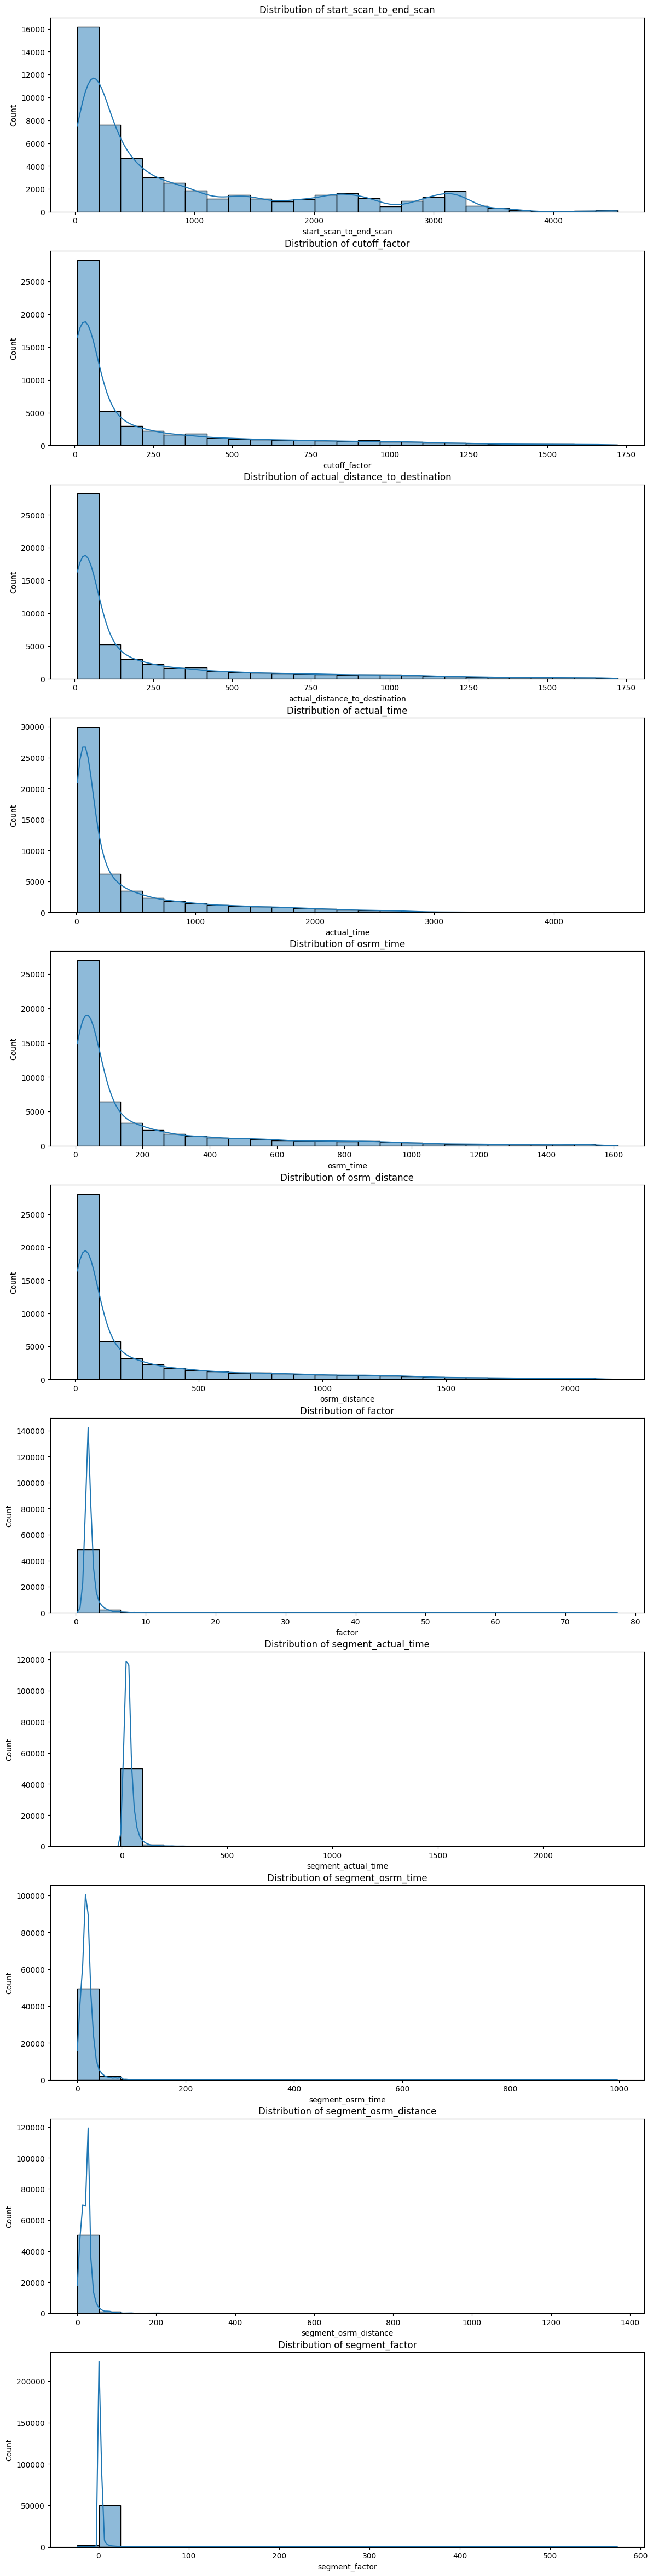

In [210]:
colums_List = ['start_scan_to_end_scan',
 'cutoff_factor',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor']

fig, ax = plt.subplots(nrows=len(colums_List), ncols=1, figsize=(14, 60))

for i in range(len(colums_List)):

    sns.histplot(x=df[colums_List[i]], kde=True, bins = 25, ax=ax[i])
    ax[i].set_title(f"Distribution of {colums_List[i]}")


plt.show()

Creating Box Plots for detecting outliers for Numerical columns

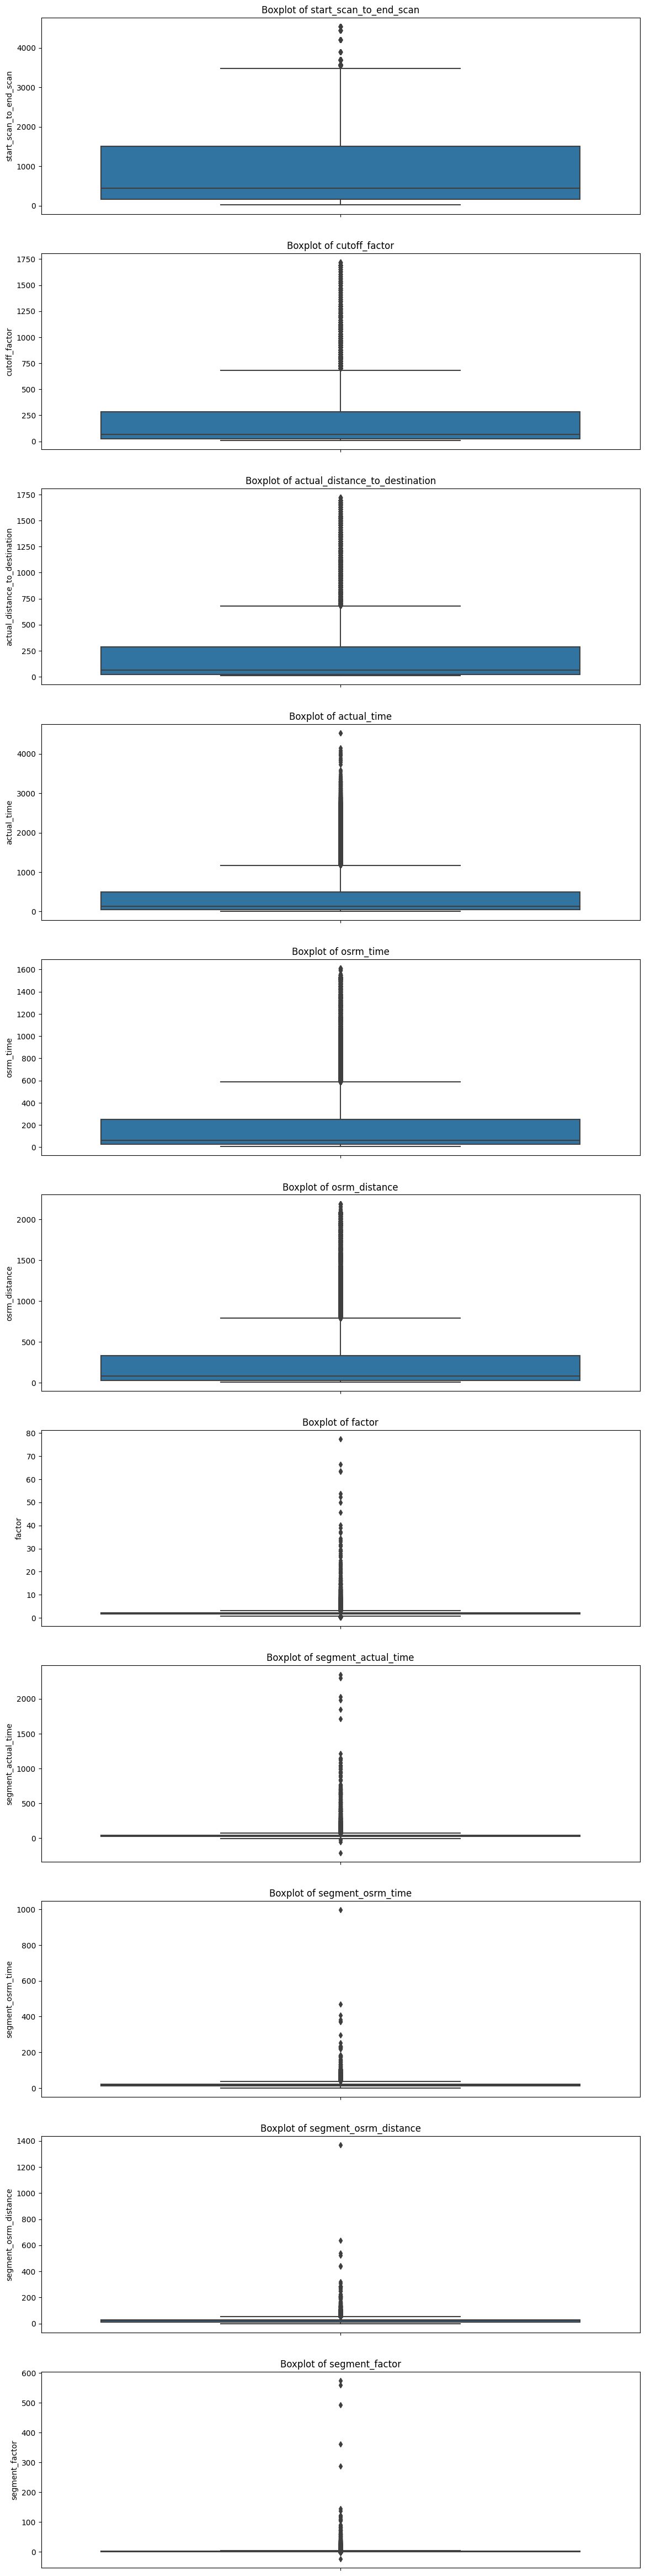

In [211]:
colums_List = ['start_scan_to_end_scan',
 'cutoff_factor',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor']

fig, ax = plt.subplots(nrows=len(colums_List), ncols=1, figsize=(14, 60))

for i in range(len(colums_List)):
  sns.boxplot(y = df[colums_List[i]], ax=ax[i], data=df)
  ax[i].set_title(f"Boxplot of {colums_List[i]}")


plt.show()

# **Feature Creation**

Sicne, the features sucha as City State and Pin code are provided in a singualr column we need to divide them in multiple columns to perform any action

Finding Source City and Source State from Cource Name columns by cplitting the data on delimiter of a WHitespace and then splitting it further on _ and finding the first string as the city name

In [212]:
df["source_city"] = df["source_name"].str.split(" ",n=1,expand=True)[0]

In [213]:
df["source_city"]

0         Anand_VUNagar_DC
1         Anand_VUNagar_DC
2         Anand_VUNagar_DC
3         Anand_VUNagar_DC
4         Anand_VUNagar_DC
               ...        
51866    Bhopal_Trnsport_H
51867    Bhopal_Trnsport_H
51868    Bhopal_Trnsport_H
51869    Bhopal_Trnsport_H
51870    Bhopal_Trnsport_H
Name: source_city, Length: 51656, dtype: object

In [214]:
df["source_city"] = df["source_city"].str.split("_",n=1,expand=True)[0]

In [215]:
df["source_city"]

0         Anand
1         Anand
2         Anand
3         Anand
4         Anand
          ...  
51866    Bhopal
51867    Bhopal
51868    Bhopal
51869    Bhopal
51870    Bhopal
Name: source_city, Length: 51656, dtype: object

In [216]:
df["source_state"] = df["source_name"].str.split(" ",n=1,expand=True)[1]

In [217]:
df["source_state"] = df["source_state"].str.replace("(","").str.replace(")","")

<ipython-input-217-e540d0ae0c78>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["source_state"] = df["source_state"].str.replace("(","").str.replace(")","")


In [218]:
df["source_state"]

0               Gujarat
1               Gujarat
2               Gujarat
3               Gujarat
4               Gujarat
              ...      
51866    Madhya Pradesh
51867    Madhya Pradesh
51868    Madhya Pradesh
51869    Madhya Pradesh
51870    Madhya Pradesh
Name: source_state, Length: 51656, dtype: object

Similarly for Destination column

In [219]:
df["destination_city"] = df["destination_name"].str.split(" ",n=1,expand=True)[0]

In [220]:
df["destination_city"] = df["destination_city"].str.split("_",n=1,expand=True)[0]

In [221]:
df["destination_state"] = df["destination_name"].str.split(" ",n=1,expand=True)[1]

In [222]:
df["destination_state"] = df["destination_state"].str.replace("(","").str.replace(")","")

<ipython-input-222-5a1bdb411b3a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["destination_state"] = df["destination_state"].str.replace("(","").str.replace(")","")


In [223]:
df["source_center"]

0        IND388121AAA
1        IND388121AAA
2        IND388121AAA
3        IND388121AAA
4        IND388121AAA
             ...     
51866    IND462022AAA
51867    IND462022AAA
51868    IND462022AAA
51869    IND462022AAA
51870    IND462022AAA
Name: source_center, Length: 51656, dtype: object

Since the first 3 letters of Source center give name of the country and letters after that give the pin code hence we are taking out the 3rd to 9th letters of the string using a function.

In [224]:
def find_pincode(x):
  return x[3:9]

In [225]:
df["source_pincode"] = df["source_center"].apply(find_pincode)
df["destination_pincode"] = df["destination_center"].apply(find_pincode)

In [226]:
df["destination_pincode"]

0        388620
1        388620
2        388620
3        388620
4        388620
          ...  
51866    000000
51867    000000
51868    000000
51869    000000
51870    000000
Name: destination_pincode, Length: 51656, dtype: object

Time_taken_btwn_odstart_and_od_end VS start_scan_to_end_scan :

In [227]:
df["time_taken_btwn_odstart_and_od_end"] = ((df["od_end_time"]-df["od_start_time"])/pd.Timedelta(1,unit="hour"))

**Creating Feature - (Source city + state & Destination city + state)**

In [228]:
df["source_city_state"] = df["source_city"] + " " + df["source_state"]
df["destination_city_state"] = df["destination_city"] + " " + df["destination_state"]

**Converting given time duration features into hours .**

In [229]:
df["actual_time"] = df["actual_time"]/60
df["osrm_time"] = df["osrm_time"]/60
df["start_scan_to_end_scan"] = df["start_scan_to_end_scan"]/60
df["segment_actual_time"] = df["segment_actual_time"]/60
df["segment_osrm_time"] = df["segment_osrm_time"]/60

Extract features like month, year and day etc


In [230]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_factor,source_city,source_state,destination_city,destination_state,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end,source_city_state,destination_city_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.272727,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.111111,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2.285714,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.750000,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,1.200000,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat


Creating Feature - (Source city + state & Destination city + state)

In [231]:
df["source_state"].unique()

array(['Gujarat', 'Maharashtra', 'Karnataka', 'Punjab', 'Haryana',
       'Uttarakhand', 'Tamil Nadu', 'Rajasthan', 'Telangana',
       'Madhya Pradesh', 'Uttar Pradesh', 'Himachal Pradesh', 'Kerala',
       'Andhra Pradesh', 'Bihar', 'Jharkhand', 'Hub Maharashtra', 'Assam',
       'West Bengal', 'Orissa', 'Delhi', 'Nagar_DC Rajasthan',
       'Jammu & Kashmir', 'Alipore_DPC West Bengal', 'Chandigarh',
       'Chhattisgarh', 'Vadgaon Sheri DPC Maharashtra', 'Goa',
       '02_DPC Uttar Pradesh', 'MP Nagar Madhya Pradesh', 'Road Punjab',
       'Pondicherry', 'Layout PC Karnataka', 'Mandakni Madhya Pradesh',
       'Dadra and Nagar Haveli', 'DC Maharashtra', 'Arunachal Pradesh',
       'Antop Hill Maharashtra', 'City Madhya Pradesh',
       'Pashan DPC Maharashtra', 'Nagaland', 'Meghalaya', 'DC Rajasthan',
       'West _Dc Maharashtra', 'Nagar Uttar Pradesh',
       '_NAD Andhra Pradesh', 'Avenue_DPC West Bengal', 'Tripura',
       'Mizoram', 'Rahatani DPC Maharashtra'], dtype=object)

Since the values for States are not exactly as per State name they need to be changed/replaced with the orginal name

In [232]:
df["source_state"] = df["source_state"].replace({"Goa Goa":"Goa",
                           "Layout PC Karnataka":"Karnataka",
                           "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                           "Pashan DPC Maharashtra":"Maharashtra",
                           "City Madhya Pradesh":"Madhya Pradesh",
                           "02_DPC Uttar Pradesh":"Uttar Pradesh",
                           "Nagar_DC Rajasthan":"Rajasthan",
                           "Alipore_DPC West Bengal":"West Bengal",
                            "Mandakni Madhya Pradesh":"Madhya Pradesh",
                            "West _Dc Maharashtra":"Maharashtra",
                            "DC Rajasthan":"Rajasthan",
                            "MP Nagar Madhya Pradesh":"Madhya Pradesh",
                            "Antop Hill Maharashtra":"Maharashtra",
                            "Avenue_DPC West Bengal":"West Bengal",
                            "Nagar Uttar Pradesh":"Uttar Pradesh",
                            "Balaji Nagar Maharashtra":"Maharashtra",
                            "Kothanur_L Karnataka":"Karnataka",
                            "Rahatani DPC Maharashtra":"Maharashtra",
                            "Mahim Maharashtra":"Maharashtra",
                            "DC Maharashtra":"Maharashtra",
                            "_NAD Andhra Pradesh":"Andhra Pradesh",
                                                       })



Similarly the State name needs to be changed for Destination states

In [233]:
df["destination_state"] = df["destination_state"].replace({"Goa Goa":"Goa",
                           "Layout PC Karnataka":"Karnataka",
                           "Vadgaon Sheri DPC Maharashtra":"Maharashtra",
                           "Pashan DPC Maharashtra":"Maharashtra",
                           "City Madhya Pradesh":"Madhya Pradesh",
                           "02_DPC Uttar Pradesh":"Uttar Pradesh",
                           "Nagar_DC Rajasthan":"Rajasthan",
                           "Alipore_DPC West Bengal":"West Bengal",
                            "Mandakni Madhya Pradesh":"Madhya Pradesh",
                            "West _Dc Maharashtra":"Maharashtra",
                            "DC Rajasthan":"Rajasthan",
                            "MP Nagar Madhya Pradesh":"Madhya Pradesh",
                            "Antop Hill Maharashtra":"Maharashtra",
                            "Avenue_DPC West Bengal":"West Bengal",
                            "Nagar Uttar Pradesh":"Uttar Pradesh",
                            "Balaji Nagar Maharashtra":"Maharashtra",
                            "Kothanur_L Karnataka":"Karnataka",
                            "Rahatani DPC Maharashtra":"Maharashtra",
                            "Mahim Maharashtra":"Maharashtra",
                            "DC Maharashtra":"Maharashtra",
                            "_NAD Andhra Pradesh":"Andhra Pradesh",
                           "Delhi Delhi":"Delhi",
                           "West_Dc Maharashtra":"Maharashtra",
                           "Hub Maharashtra":"Maharashtra"
                                                       })

Also, there are few cities for which the names are missplelled hence they need to be changed/replaced with the original name.

Note: This has been done for mostly the important cities

In [234]:
df["destination_city"].value_counts()

Gurgaon       5193
Bangalore     3426
Hyderabad     2301
Bhiwandi      2210
Kolkata       1850
              ... 
Nalbari          1
Kadaba           1
Padrauna         1
Upleta           1
Perundurai       1
Name: destination_city, Length: 1111, dtype: int64

In [235]:
df["destination_city"].replace({
    "Bangalore":"Bengaluru"
        },inplace=True)

df["destination_city"].replace({
    "Amdavad":"Ahmedabad"
        },inplace=True)

df["destination_city"].replace({
    "AMD":"Ahmedabad"
        },inplace=True)
df["destination_city"].replace({
    "del":"Delhi"
},inplace=True)

Similarly the Source cities have been renamed.

Note: This has been done for mostly the important cities

In [236]:
df["source_city"].value_counts()

Gurgaon       8410
Bangalore     3801
Bhiwandi      3224
Hyderabad     1761
Pune          1464
              ... 
Parbatsar        1
Jetpur           1
Dhoraji          1
Rajpalayam       1
Helencha         1
Name: source_city, Length: 1120, dtype: int64

In [237]:

df["source_city"].replace({
    "del":"Delhi"
},inplace=True)

df["source_city"].replace({
    "Bangalore":"Bengaluru"
        },inplace=True)

df["source_city"].replace({
    "AMD":"Ahmedabad"
        },inplace=True)
df["source_city"].replace({
    "Amdavad":"Ahmedabad"
        },inplace=True)

Since a city belongs to the same state they can be clubbed together.

Creating a separate column for Source city and State and Destination city and State.

This would help us in grouping the data easilly

In [238]:
df["source_city_state"] = df["source_city"] + " " + df["source_state"]
df["destination_city_state"] = df["destination_city"] + " " + df["destination_state"]

In [239]:
df["source_city_state"].nunique()

1126

In [240]:
df["destination_city_state"].nunique()

1112

In [241]:
df["source_state"].nunique()

33

In [242]:
df["destination_state"].nunique()

32

# **Data Cleaning**

Dropping Unnecessary columns

In [243]:
delhivery_data = df.copy()

In [244]:
delhivery_data.shape

(51656, 33)

In [245]:
delhivery_data.drop(
    ['source_center',"source_name","destination_center","destination_name","cutoff_timestamp", "od_end_time","od_start_time"],
    axis = 1,
    inplace=True
)

In [246]:
delhivery_data.shape

(51656, 26)

# **Merging of rows and aggregation of fields**

Since a single trip can id can have multiple small trips/stations in between the start and Final station ehnce the total time for the trip needs to be calculated by summing up the ful trip start_scan_to_end_scan details in hours.

Hence, we will firt find the unique values for start_scan_to_end_scan for each trip_uuid and fint eh summation for all the start_scan_to_end_scan values.

In [247]:
((delhivery_data.groupby("trip_uuid")["start_scan_to_end_scan"].unique()))

trip_uuid
trip-153671074033284934             [1.9333333333333333, 2.7333333333333334]
trip-153671079956500691                                 [0.8166666666666667]
trip-153671110078355292                                 [0.6333333333333333]
trip-153671127071609610    [3.1166666666666667, 1.4333333333333333, 3.083...
trip-153671191949943656                            [1.4333333333333333, 3.4]
                                                 ...                        
trip-153861089403973335                                 [1.6333333333333333]
trip-153861089559302126             [1.7333333333333334, 1.3666666666666667]
trip-153861089872028474             [2.1333333333333333, 0.8833333333333333]
trip-153861106442901555              [2.8833333333333333, 4.133333333333334]
trip-153861118270144424                             [1.1, 4.783333333333333]
Name: start_scan_to_end_scan, Length: 5301, dtype: object

In [248]:
start_scan_to_end_scan = ((delhivery_data.groupby("trip_uuid")["start_scan_to_end_scan"].unique())).reset_index()
start_scan_to_end_scan

,trip_uuid,start_scan_to_end_scan
0,trip-153671074033284934,"[1.9333333333333333, 2.7333333333333334]"
1,trip-153671079956500691,[0.8166666666666667]
2,trip-153671110078355292,[0.6333333333333333]
3,trip-153671127071609610,"[3.1166666666666667, 1.4333333333333333, 3.083..."
4,trip-153671191949943656,"[1.4333333333333333, 3.4]"
...,...,...
5296,trip-153861089403973335,[1.6333333333333333]
5297,trip-153861089559302126,"[1.7333333333333334, 1.3666666666666667]"
5298,trip-153861089872028474,"[2.1333333333333333, 0.8833333333333333]"
5299,trip-153861106442901555,"[2.8833333333333333, 4.133333333333334]"


In [249]:
start_scan_to_end_scan["start_scan_to_end_scan"] = start_scan_to_end_scan["start_scan_to_end_scan"].apply(sum)
start_scan_to_end_scan["start_scan_to_end_scan"]

0        4.666667
1        0.816667
2        0.633333
3       15.466667
4        4.833333
          ...    
5296     1.633333
5297     3.100000
5298     3.016667
5299     7.016667
5300     5.883333
Name: start_scan_to_end_scan, Length: 5301, dtype: float64

Similarly for actual time taken for the trip there can be multiple trips in between and has multiple values which needs to be summed up.

In [250]:
actual_time = delhivery_data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["actual_time"].max().reset_index()

In [251]:
actual_time = actual_time.groupby("trip_uuid")["actual_time"].sum().reset_index()


actual_time

,trip_uuid,actual_time
0,trip-153671074033284934,2.683333
1,trip-153671079956500691,0.383333
2,trip-153671110078355292,0.283333
3,trip-153671127071609610,9.350000
4,trip-153671191949943656,4.216667
...,...,...
5296,trip-153861089403973335,0.816667
5297,trip-153861089559302126,1.433333
5298,trip-153861089872028474,1.033333
5299,trip-153861106442901555,4.700000


Calculating the verall segment OSRM time

In [252]:
segment_osrm_time = delhivery_data[["trip_uuid","segment_osrm_time"]].groupby("trip_uuid")["segment_osrm_time"].sum().reset_index()
segment_osrm_time

,trip_uuid,segment_osrm_time
0,trip-153671074033284934,0.483333
1,trip-153671079956500691,0.233333
2,trip-153671110078355292,0.150000
3,trip-153671127071609610,4.300000
4,trip-153671191949943656,2.200000
...,...,...
5296,trip-153861089403973335,0.666667
5297,trip-153861089559302126,0.500000
5298,trip-153861089872028474,0.550000
5299,trip-153861106442901555,1.466667


Calculating the verall segment actual time

In [253]:
segment_actual_time = delhivery_data.groupby("trip_uuid")["segment_actual_time"].sum().reset_index()
segment_actual_time

,trip_uuid,segment_actual_time
0,trip-153671074033284934,2.683333
1,trip-153671079956500691,0.383333
2,trip-153671110078355292,0.283333
3,trip-153671127071609610,9.233333
4,trip-153671191949943656,4.200000
...,...,...
5296,trip-153861089403973335,0.800000
5297,trip-153861089559302126,1.433333
5298,trip-153861089872028474,1.016667
5299,trip-153861106442901555,4.683333


Calculating the overall  OSRM time

In [254]:
osrm_time = delhivery_data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["osrm_time"].max().reset_index().groupby("trip_uuid")["osrm_time"].sum().reset_index()
osrm_time

,trip_uuid,osrm_time
0,trip-153671074033284934,0.483333
1,trip-153671079956500691,0.133333
2,trip-153671110078355292,0.150000
3,trip-153671127071609610,4.216667
4,trip-153671191949943656,1.816667
...,...,...
5296,trip-153861089403973335,0.600000
5297,trip-153861089559302126,0.500000
5298,trip-153861089872028474,0.466667
5299,trip-153861106442901555,0.900000


Calculating the overall time_taken_btwn_odstart_and_od_end

In [255]:
time_taken_btwn_odstart_and_od_end = delhivery_data.groupby("trip_uuid")["time_taken_btwn_odstart_and_od_end"].unique().reset_index()
time_taken_btwn_odstart_and_od_end

,trip_uuid,time_taken_btwn_odstart_and_od_end
0,trip-153671074033284934,"[1.9336958177777779, 2.7470374730555553]"
1,trip-153671079956500691,[0.8222231644444444]
2,trip-153671110078355292,[0.6416751322222223]
3,trip-153671127071609610,"[3.117864381388889, 1.4494377752777778, 3.0946..."
4,trip-153671191949943656,"[1.434259866111111, 3.4101113]"
...,...,...
5296,trip-153861089403973335,[1.6454431694444445]
5297,trip-153861089559302126,"[1.7479402002777777, 1.378813956111111]"
5298,trip-153861089872028474,"[2.145540998611111, 0.8947367238888889]"
5299,trip-153861106442901555,"[2.895179575833333, 4.1401515375]"


In [256]:
time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"] = time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].apply(sum)
time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]

0        4.680733
1        0.822223
2        0.641675
3       15.511243
4        4.844371
          ...    
5296     1.645443
5297     3.126754
5298     3.040278
5299     7.035331
5300     5.906793
Name: time_taken_btwn_odstart_and_od_end, Length: 5301, dtype: float64

Calculating the overall osrm_distance by cumming up ditance between each of the trip stops grouped on the trip_uuid

In [257]:
osrm_distance = delhivery_data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["osrm_distance"].max().reset_index().groupby("trip_uuid")["osrm_distance"].sum().reset_index()

osrm_distance

,trip_uuid,osrm_distance
0,trip-153671074033284934,30.9359
1,trip-153671079956500691,10.0040
2,trip-153671110078355292,10.8159
3,trip-153671127071609610,284.4582
4,trip-153671191949943656,130.3470
...,...,...
5296,trip-153861089403973335,45.1574
5297,trip-153861089559302126,34.9224
5298,trip-153861089872028474,38.2867
5299,trip-153861106442901555,63.2841


Calculating the overall actual_distance by summing up ditance between each of the trip stops grouped on the trip_uuid

In [258]:
actual_distance_to_destination = delhivery_data.groupby(["trip_uuid",
              "start_scan_to_end_scan"])["actual_distance_to_destination"].max().reset_index().groupby("trip_uuid")["actual_distance_to_destination"].sum().reset_index()

actual_distance_to_destination

,trip_uuid,actual_distance_to_destination
0,trip-153671074033284934,25.454848
1,trip-153671079956500691,9.872146
2,trip-153671110078355292,9.396526
3,trip-153671127071609610,230.413870
4,trip-153671191949943656,99.975595
...,...,...
5296,trip-153861089403973335,33.898361
5297,trip-153861089559302126,28.114091
5298,trip-153861089872028474,27.010926
5299,trip-153861106442901555,38.684839


Calculating the overall segment OSRM ditance by summing up ditance between each of the trip stops grouped on the trip_uuid

In [259]:
segment_osrm_distance = delhivery_data[["trip_uuid",
                              "segment_osrm_distance"]].groupby("trip_uuid")["segment_osrm_distance"].sum().reset_index()

segment_osrm_distance

,trip_uuid,segment_osrm_distance
0,trip-153671074033284934,30.9358
1,trip-153671079956500691,16.0860
2,trip-153671110078355292,10.8159
3,trip-153671127071609610,293.8447
4,trip-153671191949943656,140.5623
...,...,...
5296,trip-153861089403973335,50.0725
5297,trip-153861089559302126,34.9223
5298,trip-153861089872028474,33.6400
5299,trip-153861106442901555,104.8866


In [260]:
delhivery_data.loc[delhivery_data['trip_uuid'] == 'trip-153671041653548748']['start_scan_to_end_scan'].unique()

array([], dtype=float64)

# **Hypothesis Testing**

Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required
Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.


H0: Mean of time taken betweenn trip end ans start time = Mean of start and end scan time

Ha: Mean of time taken betweenn trip end ans start time != Mean of start and end scan time

<ipython-input-261-cb8c0d07834f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]))
<ipython-input-261-cb8c0d07834f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))


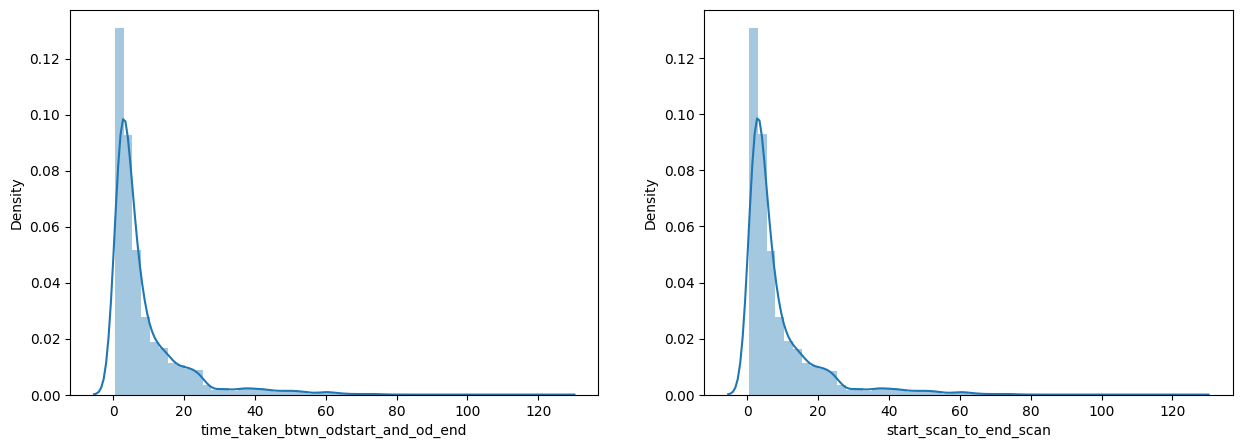

In [261]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]))
plt.subplot(122)
sns.distplot((start_scan_to_end_scan["start_scan_to_end_scan"]))

plt.show()

In [262]:
t_stat, p_value = stats.ttest_ind((time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"].sample(3000))
                ,(start_scan_to_end_scan["start_scan_to_end_scan"].sample(3000)),alternative="two-sided")


In [263]:
# Ho: The distribution are similar
# Ha: The disbutions are different

if p_value < 0.05:
    print("Reject Ho: Means of both the samples are different.")
else :
    print("Fail to reject Ho:  Means of both the samples are same.")

Fail to reject Ho:  Means of both the samples are same.


Since T Test has failed we can also complare the values using KS Test

# KS Test to check the similarity of distribution of these two.

In [264]:
ks_test, p_value = stats.ks_2samp(time_taken_btwn_odstart_and_od_end["time_taken_btwn_odstart_and_od_end"]
               ,start_scan_to_end_scan["start_scan_to_end_scan"])

In [265]:
# Ho: The distribution are similar
# Ha: The disbutions are different

if p_value < 0.05:
    print("Reject Ho: The distribution are different.")
else :
    print("Fail to reject Ho: The distribution is same.")

Fail to reject Ho: The distribution is same.


Analysis of  actual_time aggregated value and OSRM time aggregated value

H0: Mean of OSRM time >= Mean of Actual time taken to complete delivery
Ha: Mean of OSRM time < Mean of Actual time taken to complete delivery

<ipython-input-266-91db7747a821>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(((actual_time["actual_time"])))
<ipython-input-266-91db7747a821>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(((osrm_time["osrm_time"])))


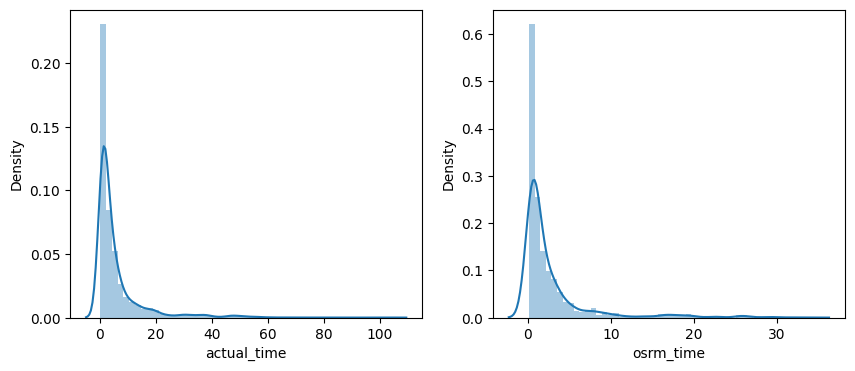

In [266]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((actual_time["actual_time"])))
plt.subplot(122)
sns.distplot(((osrm_time["osrm_time"])))

plt.show()

In [267]:
print("Actual Time mean:", actual_time["actual_time"].mean())
print("Osrm_time mean:", osrm_time["osrm_time"].mean())

Actual Time mean: 5.876026535873734
Osrm_time mean: 2.6862950386719486


Using Ttest_ind we can find out if the samples for actual_time and osrm_time have significantally different means

In [268]:
t_stat, p_value = stats.ttest_ind(actual_time["actual_time"].sample(5000),
               osrm_time["osrm_time"].sample(5000),alternative='greater')

In [269]:
# Ho: The distribution are similar
# Ha: The disbutions are different

if p_value < 0.05:
    print("Reject Ho: Means of both the samples are different.")
else :
    print("Fail to reject Ho:  Means of both the samples are same.")

Reject Ho: Means of both the samples are different.


From above ttest_ind we can conclude that, the population mean actual time taken to complete delivert from source to warehouse and orsm estimate mean time for population are not same.

From this we can conclude that, actual time is higher than the osrm estimated time for delivery.

**Analysis of Actual_time aggregated value and segment actual time aggregated value**

H0: Mean Actual time = Mean segment actual time
Ha: Mean Actual time != Mean segment actual time

Here we will perform a two tailed test

<ipython-input-270-1fcfd05e8e5d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(((actual_time["actual_time"])))
<ipython-input-270-1fcfd05e8e5d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(((segment_actual_time["segment_actual_time"])))


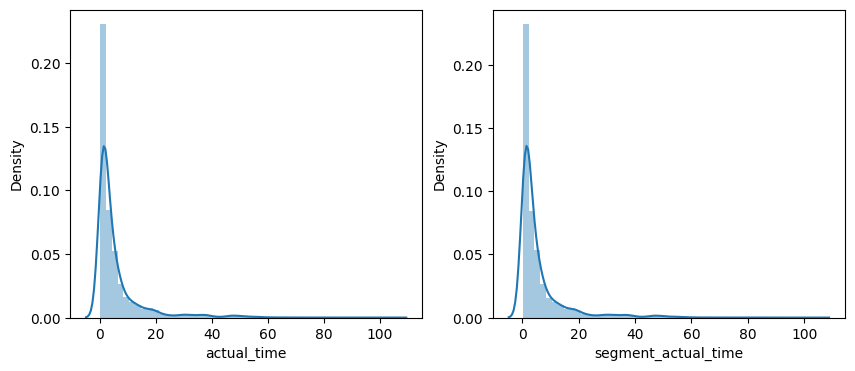

In [270]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((actual_time["actual_time"])))
plt.subplot(122)
sns.distplot(((segment_actual_time["segment_actual_time"])))

plt.show()

In [271]:
print("Mean of Actual time:",actual_time["actual_time"].mean())
print("Mean of Segment time:",segment_actual_time["segment_actual_time"].mean())

Mean of Actual time: 5.876026535873734
Mean of Segment time: 5.830255297742564


In [272]:
t_stat, p_value = stats.ttest_ind((actual_time["actual_time"].sample(3000)),
                (segment_actual_time["segment_actual_time"].sample(3000)), alternative="two-sided")

In [273]:
# Ho: The distribution are similar
# Ha: The disbutions are different

if p_value < 0.05:
    print("Reject Ho: Means of both the samples are different.")
else :
    print("Fail to reject Ho:  Means of both the samples are same.")

Fail to reject Ho:  Means of both the samples are same.


Conclusion: Actual Time taken to complete delivery trip and segment actual time are same.


**Analysing and Visulizing OSRM Estimated distance and Segment-osrm-distance:**

H0 : Segment OSRM distnace <= OSRM distnace
Ha : Segment OSRM distnace > OSRM distnace

<ipython-input-274-b59a614a5fbd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(((osrm_distance["osrm_distance"])))
<ipython-input-274-b59a614a5fbd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(((segment_osrm_distance["segment_osrm_distance"])))


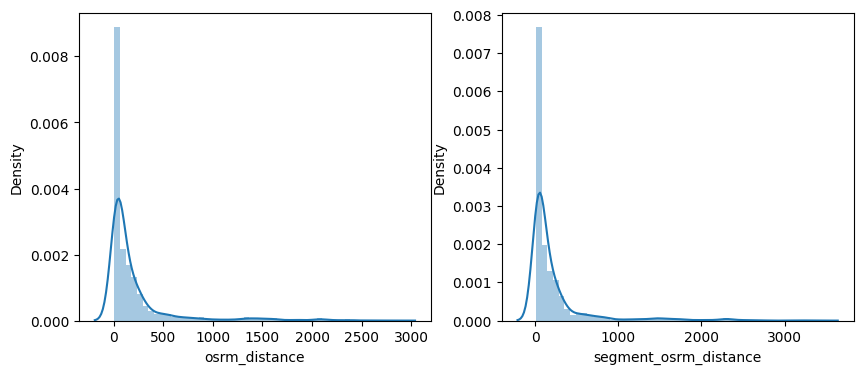

In [274]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_distance["osrm_distance"])))
plt.subplot(122)
sns.distplot(((segment_osrm_distance["segment_osrm_distance"])))

plt.show()

In [275]:
print("osrm_distance", osrm_distance["osrm_distance"].mean())
print("segment_osrm_distance",segment_osrm_distance["segment_osrm_distance"].mean())

osrm_distance 203.91173936993022
segment_osrm_distance 222.01615517826824


In [276]:
t_stat, p_value = stats.ttest_ind(osrm_distance["osrm_distance"].sample(5000),
               segment_osrm_distance["segment_osrm_distance"].sample(5000),alternative="less")

In [277]:
# Ho: The distribution are similar
# Ha: The disbutions are different

if p_value < 0.05:
    print("Reject Ho: Means of both the samples are different.")
else :
    print("Fail to reject Ho:  Means of both the samples are same.")

Reject Ho: Means of both the samples are different.


from two sample one sided ttest, we can conclude: Average of osrm distance for population is less than average of segment osrm distnace

**Analysing osrm Time & segment-osrm-time**

Ho: segment actual time <= OSRM time
Ha: segment actual time > OSRM time

<ipython-input-278-cdfaa1cbadd0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(((osrm_time["osrm_time"])))
<ipython-input-278-cdfaa1cbadd0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(((segment_osrm_time["segment_osrm_time"])))


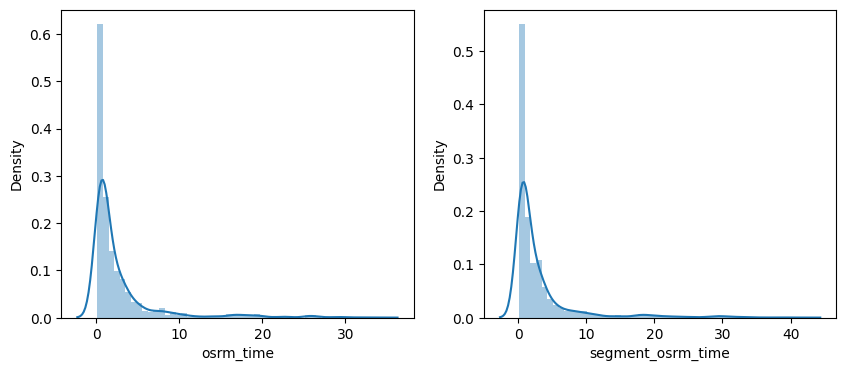

In [278]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(((osrm_time["osrm_time"])))
plt.subplot(122)
sns.distplot(((segment_osrm_time["segment_osrm_time"])))

plt.show()

In [279]:
print("osrm_time mean",osrm_time["osrm_time"].mean())
print("segment_osrm_time mean",segment_osrm_time["segment_osrm_time"].mean())


osrm_time mean 2.6862950386719486
segment_osrm_time mean 3.000874048921587


In [280]:
t_stat, p_value = stats.ttest_ind((osrm_time["osrm_time"].sample(3000)),
                (segment_osrm_time["segment_osrm_time"].sample(3000)),alternative ="less")

In [281]:
# Ho: The distribution are similar
# Ha: The disbutions are different

if p_value < 0.05:
    print("Reject Ho: Means of both the samples are different.")
else :
    print("Fail to reject Ho:  Means of both the samples are same.")

Reject Ho: Means of both the samples are different.


# **Outlier treatment **

In order to find the outliers we need to create box plots for the numerical data columns.

Here, distance fields and time related fields have been taken in separate plots since both of them have a separate scale and range of values.

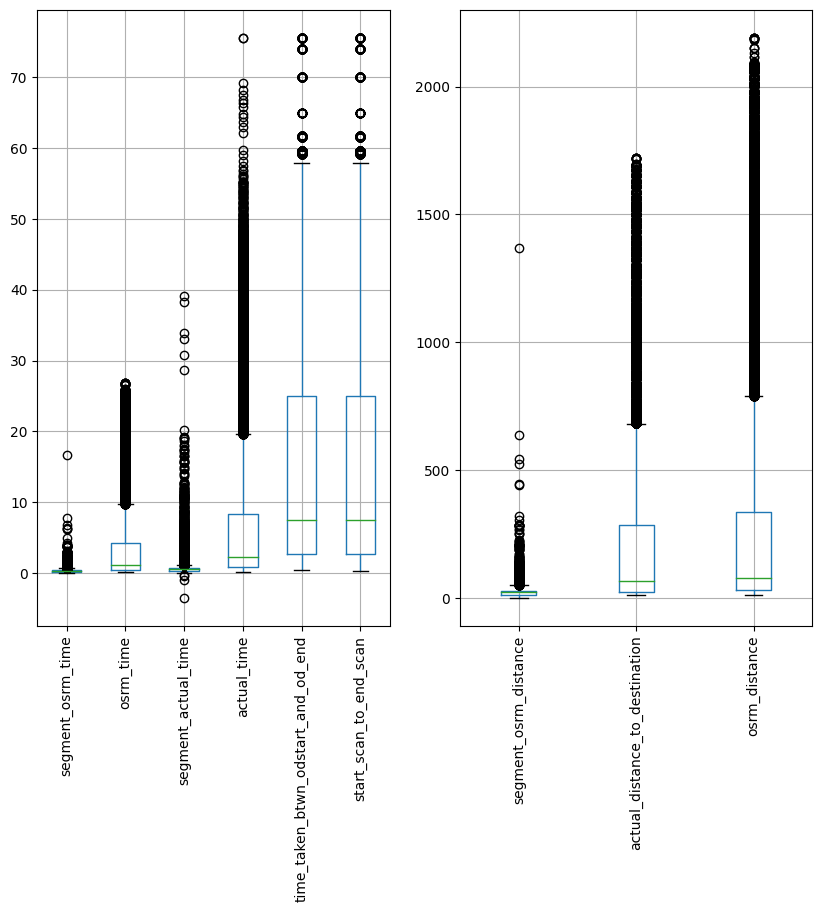

In [282]:
plt.figure(figsize = (10,8))
plt.subplot(121)
delhivery_data[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan']].boxplot()
plt.xticks(rotation =90)
plt.subplot(122)
delhivery_data[['segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']].boxplot()
plt.xticks(rotation =90)
plt.show()

In [283]:
delhivery_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51656 entries, 0 to 51870
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   data                                51656 non-null  object        
 1   trip_creation_time                  51656 non-null  datetime64[ns]
 2   route_schedule_uuid                 51656 non-null  object        
 3   route_type                          51656 non-null  object        
 4   trip_uuid                           51656 non-null  object        
 5   start_scan_to_end_scan              51656 non-null  float64       
 6   is_cutoff                           51656 non-null  bool          
 7   cutoff_factor                       51656 non-null  int64         
 8   actual_distance_to_destination      51656 non-null  float64       
 9   actual_time                         51655 non-null  float64       
 10  osrm_time             

In [284]:
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time','segment_osrm_distance',
           'segment_osrm_time']

# **Handling the outliers using IQR method¶**

In roder to handle the outliers we need to find the 25th and 75th percentiles value for each column.

The difference between the two will be the IQR

In [285]:
Q1 = delhivery_data[num_cols].quantile(0.25)
Q3 = delhivery_data[num_cols].quantile(0.75)

IQR = Q3 - Q1

In [286]:
print(Q1)

start_scan_to_end_scan             2.683333
actual_distance_to_destination    23.344687
actual_time                        0.866667
osrm_time                          0.450000
osrm_distance                     29.879100
segment_actual_time                0.333333
segment_osrm_distance             12.083750
segment_osrm_time                  0.183333
Name: 0.25, dtype: float64


In [287]:
print(Q3)

start_scan_to_end_scan             25.016667
actual_distance_to_destination    286.149752
actual_time                         8.350000
osrm_time                           4.183333
osrm_distance                     333.794700
segment_actual_time                 0.666667
segment_osrm_distance              27.804950
segment_osrm_time                   0.366667
Name: 0.75, dtype: float64


Now, the values which are above the Q3(75th percentile) + 1.5 IQR and below the Q1(25th percentile) - 1.5 IQR are the min and max boundaries of the box plot. Any value which is aboev max and below min are the outliers.


Hence, we need to filter the values which are between min and Max values

In [288]:
Min = Q1 - 1.5 * IQR
Max = Q3 + 1.5 * IQR

delhivery_data_new = delhivery_data[-((delhivery_data[num_cols] < (Min)) | (delhivery_data[num_cols] > (Max))).any(axis=1)]
delhivery_data_new = delhivery_data_new.reset_index(drop=True)

In [289]:
delhivery_data_new.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,actual_time,...,segment_factor,source_city,source_state,destination_city,destination_state,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end,source_city_state,destination_city_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,9,10.435660,0.233333,...,1.272727,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,18,18.936842,0.400000,...,1.111111,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,27,27.637279,0.666667,...,2.285714,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,True,36,36.118028,1.033333,...,1.750000,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,1.433333,False,39,39.386040,1.133333,...,1.200000,Anand,Gujarat,Khambhat,Gujarat,388121,388620,1.436894,Anand Gujarat,Khambhat Gujarat


The same boxplots have been plotted again for those distance and time columns.

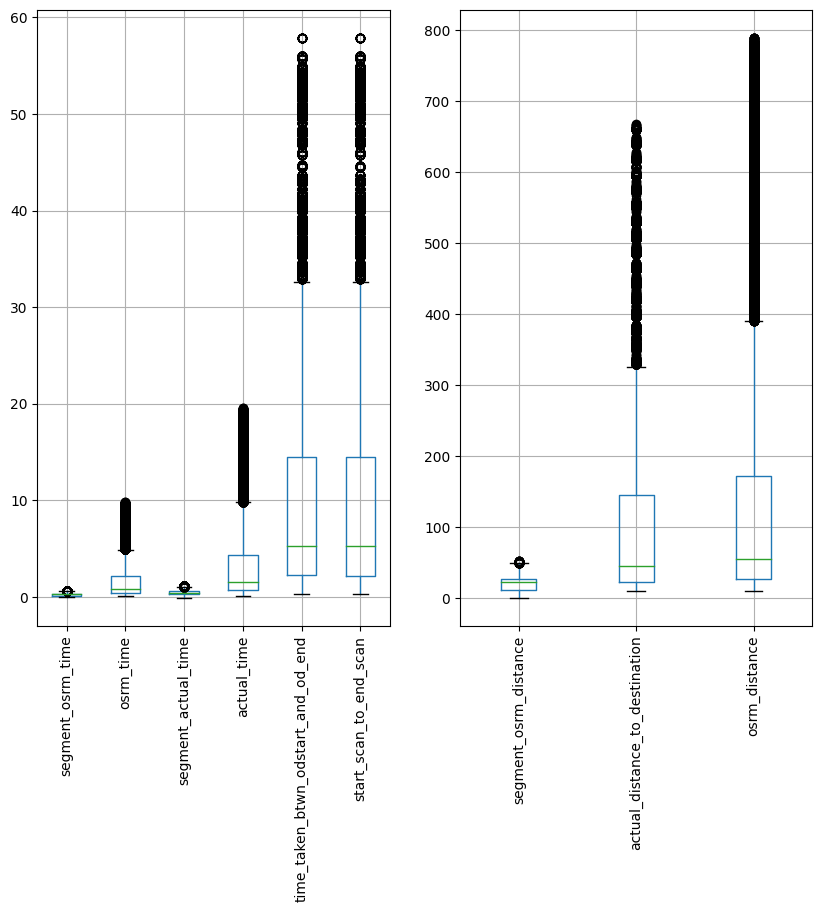

In [290]:
plt.figure(figsize = (10,8))
plt.subplot(121)
delhivery_data_new[['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan']].boxplot()
plt.xticks(rotation =90)
plt.subplot(122)
delhivery_data_new[['segment_osrm_distance', 'actual_distance_to_destination',
       'osrm_distance']].boxplot()
plt.xticks(rotation =90)
plt.show()

After removing the outliers the range of Outliers has reduced. Ealier the range was 120 units and 2000 units for time and distnace paramerts respectively.

However,it changed  to 60 and 800 for time and distance paramerters. Hence removing the bigger outliers.

# **Handling categorical values**

In order to handle categorical values in a better manner we will use One hot encoding method

Here, we will merge locations details into one columnand re categorise the data as per highest trips having location as top category

In [291]:
delhivery_data_new["destination_source_locations"] = delhivery_data_new["source_city_state"]+" "+delhivery_data_new["destination_city_state"]
delhivery_data_new.drop(["source_city_state","destination_city_state"],axis = 1,inplace=True)

In [292]:
delhivery_data_new.groupby(["destination_source_locations"])["trip_uuid"].nunique()

destination_source_locations
Achrol Rajasthan Jaipur Rajasthan                  2
Adoor Kerala Kollam Kerala                         7
Agra Uttar Pradesh Delhi Delhi                     3
Agra Uttar Pradesh Gurgaon Haryana                 1
Agra Uttar Pradesh Kirauli Uttar Pradesh           6
                                                  ..
Weir Rajasthan Kherli Rajasthan                    2
YamunaNagar Haryana PaontSahib Himachal Pradesh    4
Yellandu Telangana Rayaparthi Telangana            3
Yellareddy Telangana Medak Telangana               6
Zahirabad Telangana Hyderabad Telangana            8
Name: trip_uuid, Length: 1801, dtype: int64

In [293]:
df_source_to_destination = delhivery_data_new.groupby(["destination_source_locations"])["trip_uuid"].nunique().sort_values(ascending= False).reset_index()

In [294]:
df_source_to_destination

,destination_source_locations,trip_uuid
0,Bengaluru Karnataka Bengaluru Karnataka,473
1,Bhiwandi Maharashtra Mumbai Maharashtra,171
2,Mumbai Maharashtra Mumbai Maharashtra,123
3,Hyderabad Telangana Hyderabad Telangana,112
4,Delhi Delhi Gurgaon Haryana,98
...,...,...
1796,Radhanpur Gujarat Mehsana Gujarat,1
1797,Puttur Karnataka Sullia Karnataka,1
1798,Honnavar Karnataka Kumta Karnataka,1
1799,Hooghly West Bengal Kolkata West Bengal,1


In [295]:
def create_Category(H):
    if 0 <= H <= 50:
        return "Category 7"
    elif 51 <= H <= 100:
        return "Category 6"
    elif 101 <= H <= 200:
        return "Category 5"
    elif 201 <= H <= 300:
        return "Category 4"
    elif 301 <= H <= 400:
        return "Category 3"
    elif 401 <= H <= 500:
        return "Category 2"
    else:
        return "Category 1"

In [296]:
df_source_to_destination["city"]  = pd.Series(map(create_Category,df_source_to_destination["trip_uuid"]))
encoded_df = df_source_to_destination.merge(delhivery_data_new,
            on="destination_source_locations")
encoded_df.drop(["destination_source_locations","trip_uuid_x"],axis = 1,inplace=True)
encoded_df.drop(["trip_uuid_y"],axis = 1,inplace=True)
# encoded_df.sample(15)
df_encoded_final = pd.get_dummies(encoded_df,
             columns=["route_type","city"] )



In [297]:
df_encoded_final.head()

,data,trip_creation_time,route_schedule_uuid,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,...,destination_state,source_pincode,destination_pincode,time_taken_btwn_odstart_and_od_end,route_type_Carting,route_type_FTL,city_Category 2,city_Category 5,city_Category 6,city_Category 7
0,training,2018-09-13 20:44:19.424489,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,3.25,True,22,23.635811,0.500000,0.500000,28.9765,...,Karnataka,562132,560099,3.260177,0,1,1,0,0,0
1,training,2018-09-13 20:44:19.424489,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,3.25,False,39,39.806036,1.116667,0.883333,52.1256,...,Karnataka,562132,560099,3.260177,0,1,1,0,0,0
2,training,2018-09-17 21:26:00.454695,thanos::sroute:87d41453-285f-40a2-b56c-64d56e1...,5.35,True,9,10.259661,0.250000,0.250000,14.1889,...,Karnataka,562132,560083,5.364934,1,0,1,0,0,0
3,training,2018-09-17 21:26:00.454695,thanos::sroute:87d41453-285f-40a2-b56c-64d56e1...,5.35,True,18,18.973336,0.450000,0.366667,23.5235,...,Karnataka,562132,560083,5.364934,1,0,1,0,0,0
4,training,2018-09-17 21:26:00.454695,thanos::sroute:87d41453-285f-40a2-b56c-64d56e1...,5.35,True,27,27.176034,0.850000,0.516667,36.1825,...,Karnataka,562132,560083,5.364934,1,0,1,0,0,0


Column Standardization

In [298]:
['segment_osrm_time', 'osrm_time',
       'segment_actual_time', 'actual_time',
       'time_taken_btwn_odstart_and_od_end', 'start_scan_to_end_scan' ,'segment_osrm_distance', 'actual_distance_to_destination','osrm_distance' ]

['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance']

In [299]:
scaler = StandardScaler()
std_data = scaler.fit_transform(df_encoded_final[['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance']])
std_data = pd.DataFrame(std_data, columns=['segment_osrm_time',
 'osrm_time',
 'segment_actual_time',
 'actual_time',
 'time_taken_btwn_odstart_and_od_end',
 'start_scan_to_end_scan',
 'segment_osrm_distance',
 'actual_distance_to_destination',
 'osrm_distance'])
std_data.head()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,1.831465,-0.592058,0.165969,-0.706895,-0.599807,-0.599960,0.985971,-0.621895,-0.623654
1,1.321647,-0.412278,0.646359,-0.555330,-0.599807,-0.599960,0.572970,-0.510832,-0.490544
2,-0.080352,-0.709305,-0.863437,-0.768340,-0.437058,-0.437579,-0.532502,-0.713768,-0.708684
3,-0.335261,-0.654589,-1.069318,-0.719184,-0.437058,-0.437579,-0.615575,-0.653919,-0.655009
4,-0.717624,-0.584241,-0.314420,-0.620871,-0.437058,-0.437579,-0.908938,-0.597580,-0.582218


In [300]:
scaler = MinMaxScaler()
MinMax_data = scaler.fit_transform(df_encoded_final[['segment_osrm_time','osrm_time','segment_actual_time','actual_time',
 'time_taken_btwn_odstart_and_od_end','start_scan_to_end_scan','segment_osrm_distance','actual_distance_to_destination',
 'osrm_distance']])
MinMax_data = pd.DataFrame(MinMax_data,columns=['segment_osrm_time',
 'osrm_time','segment_actual_time','actual_time','time_taken_btwn_odstart_and_od_end','start_scan_to_end_scan',
 'segment_osrm_distance','actual_distance_to_destination','osrm_distance'])
MinMax_data.head()

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,0.789474,0.041308,0.472973,0.018026,0.050659,0.050681,0.564337,0.022224,0.025473
1,0.684211,0.080895,0.567568,0.049785,0.050659,0.050681,0.486006,0.046778,0.055139
2,0.394737,0.015491,0.270270,0.005150,0.087236,0.087171,0.276338,0.001912,0.006523
3,0.342105,0.027539,0.229730,0.015451,0.087236,0.087171,0.260583,0.015144,0.018485
4,0.263158,0.043029,0.378378,0.036052,0.087236,0.087171,0.204943,0.027599,0.034708


In [301]:
std_data

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance
0,1.831465,-0.592058,0.165969,-0.706895,-0.599807,-0.599960,0.985971,-0.621895,-0.623654
1,1.321647,-0.412278,0.646359,-0.555330,-0.599807,-0.599960,0.572970,-0.510832,-0.490544
2,-0.080352,-0.709305,-0.863437,-0.768340,-0.437058,-0.437579,-0.532502,-0.713768,-0.708684
3,-0.335261,-0.654589,-1.069318,-0.719184,-0.437058,-0.437579,-0.615575,-0.653919,-0.655009
4,-0.717624,-0.584241,-0.314420,-0.620871,-0.437058,-0.437579,-0.908938,-0.597580,-0.582218
...,...,...,...,...,...,...,...,...,...
40522,0.429466,0.455351,-0.177166,0.341770,-0.260372,-0.261021,0.164240,0.425361,0.329793
40523,0.939284,0.502250,0.303223,0.472854,-0.260372,-0.261021,0.781853,0.583757,0.549281
40524,0.811829,0.650763,0.234596,0.603937,-0.260372,-0.261021,0.827609,0.728876,0.675167
40525,1.449101,0.861808,1.950273,0.833332,-0.260372,-0.261021,1.417538,0.878639,0.865952


In [302]:
one_hot_encoded_data = df_encoded_final[["route_type_Carting","route_type_FTL",
 "city_Category 5","city_Category 6","city_Category 7"]]

In [303]:
Standardized_Data = pd.concat([std_data,one_hot_encoded_data],axis = 1)

In [304]:
Min_Max_Scaled_Data = pd.concat([MinMax_data,one_hot_encoded_data],axis = 1)

In [305]:
Standardized_Data.sample(5)

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_type_Carting,route_type_FTL,city_Category 5,city_Category 6,city_Category 7
11041,1.066738,-0.638956,1.126748,-0.649546,-0.704523,-0.704349,0.566665,-0.623511,-0.647134,0,1,0,0,1
20577,-0.207806,-0.670222,-0.794810,-0.702798,-0.741801,-0.741722,-0.212565,-0.659165,-0.640096,1,0,0,0,1
35801,1.321647,-0.662406,1.744392,-0.518463,0.578324,0.577952,1.746255,-0.652423,-0.644479,1,0,0,0,1
2114,-1.482350,-0.599874,-0.932064,-0.551233,-0.478227,-0.478818,-1.578407,-0.630198,-0.600089,1,0,1,0,0
9256,1.704010,2.339123,0.852240,2.000791,2.097559,2.097381,1.238157,2.250267,2.214508,0,1,0,0,1


In [306]:
Min_Max_Scaled_Data.sample(5)

,segment_osrm_time,osrm_time,segment_actual_time,actual_time,time_taken_btwn_odstart_and_od_end,start_scan_to_end_scan,segment_osrm_distance,actual_distance_to_destination,osrm_distance,route_type_Carting,route_type_FTL,city_Category 5,city_Category 6,city_Category 7
2040,0.000000,0.029260,0.067568,0.033476,0.041392,0.041413,0.000000,0.018882,0.023643,1,0,1,0,0
898,0.210526,0.074010,0.175676,0.047210,0.023332,0.023458,0.112162,0.029702,0.037664,1,0,0,0,0
6052,0.868421,0.153184,0.297297,0.144206,0.105587,0.105705,0.301127,0.082726,0.090594,1,0,0,0,1
4940,0.394737,0.165232,0.256757,0.205150,0.119219,0.119317,0.310236,0.139180,0.155012,0,1,0,0,1
33304,0.947368,0.065404,0.445946,0.049785,0.136906,0.136982,0.994227,0.054021,0.065402,0,1,0,0,1


# **Business Insights**

In [307]:
Number_of_trips_between_cities = delhivery_data.groupby(["source_city_state",
                                               "destination_city_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
Number_of_trips_between_cities.head(10)

,source_city_state,destination_city_state,trip_uuid
0,Bengaluru Karnataka,Bengaluru Karnataka,480
1,Bhiwandi Maharashtra,Mumbai Maharashtra,176
2,Mumbai Maharashtra,Mumbai Maharashtra,126
3,Hyderabad Telangana,Hyderabad Telangana,116
4,Delhi Delhi,Gurgaon Haryana,101
5,Mumbai Maharashtra,Bhiwandi Maharashtra,90
6,Gurgaon Haryana,Delhi Delhi,81
7,Mumbai Hub Maharashtra,Mumbai Maharashtra,74
8,Chennai Tamil Nadu,Chennai Tamil Nadu,74
9,MAA Tamil Nadu,Chennai Tamil Nadu,67


From above table, we can observe that Mumbai Maharashtra ,Delhi ,Gurgaon(Haryana),Bengaluru Karnataka ,Hyderabad Telangana,Chennai Tamil Nadu,Ahmedabad Gujarat,Pune Maharashtra,Chandigarh Chandigarh and Kolkata West Bengal are some cities have higest amount of trips happening states with in the city

In [308]:
Number_of_trips_between_cities.loc[Number_of_trips_between_cities["source_city_state"] != Number_of_trips_between_cities["destination_city_state"]].head(10)

,source_city_state,destination_city_state,trip_uuid
1,Bhiwandi Maharashtra,Mumbai Maharashtra,176
4,Delhi Delhi,Gurgaon Haryana,101
5,Mumbai Maharashtra,Bhiwandi Maharashtra,90
6,Gurgaon Haryana,Delhi Delhi,81
7,Mumbai Hub Maharashtra,Mumbai Maharashtra,74
9,MAA Tamil Nadu,Chennai Tamil Nadu,67
11,Pune Maharashtra,PNQ Maharashtra,51
12,Pune Maharashtra,Bhiwandi Maharashtra,46
15,Chennai Tamil Nadu,MAA Tamil Nadu,42
16,Bengaluru Karnataka,HBR Karnataka,40


If we talk about , not having equal source and destination states , source and destination cities having higest number of trips in between are :

Delhi to Gurgaon
Gurgaon,Haryana TO Bengaluru,Karnataka
Bhiwandi/Mumbai,Maharashtra TO Pune Maharashtra
Sonipat TO Gurgaon,Haryana

It has also been observed that lots of deliveries are happening to airpots
like : Chennai to MAA chennai international Airport , Pune to Pune Airport (PNQ),Kolkata to CCU West Bengal Kolkata International Airport , Bengluru to BLR-Bengaluru Internation Airport etc.

**IN order to create a relationship between variopus routes we need to group the data wrt route_schedule_uuid**

In [319]:
A = delhivery_data.groupby("route_schedule_uuid")["route_type"].unique().reset_index()
B = delhivery_data.groupby("route_schedule_uuid")["destination_city"].unique().reset_index()
B.columns = ["route_schedule_uuid","destination_cities"]
C = delhivery_data.groupby("route_schedule_uuid")["source_city"].unique().reset_index()
C.columns = ["route_schedule_uuid","source_cities"]
D = delhivery_data.groupby("route_schedule_uuid")["source_state"].unique().reset_index()
D.columns = ["route_schedule_uuid","source_states"]
E = delhivery_data.groupby("route_schedule_uuid")["destination_state"].unique().reset_index()
E.columns = ["route_schedule_uuid","destination_states"]
F = delhivery_data.groupby("route_schedule_uuid")[["source_state",
                                         "destination_state"]].nunique().sort_values(by="source_state",
                                                                                     ascending=False).reset_index()
F.columns = ["route_schedule_uuid","#source_states"
             ,"#destination_states"]
G = delhivery_data_new.groupby("route_schedule_uuid")["actual_distance_to_destination"].mean().reset_index()
G.columns = ["route_schedule_uuid","Average_Actual_distance_to_destination"]
H = delhivery_data_new["route_schedule_uuid"].value_counts().reset_index()
H.columns = ["route_schedule_uuid","Number_of_Trips"]
I = delhivery_data.groupby("route_schedule_uuid")[["source_city",
                                         "destination_city"]].nunique().sort_values(by="source_city",
                                                                                     ascending=False).reset_index()
I.columns = ["route_schedule_uuid","#source_cities"
             ,"#destination_cities"]

Here, we are merging all the route details which werre separately captured in order to create route wise data

In [320]:
route_records = I.merge(H.merge(G.merge(F.merge(E.merge(D.merge(C.merge(A.merge(B,
        on ="route_schedule_uuid",
        how = "outer"),on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),
       on ="route_schedule_uuid",
        how = "outer"),on ="route_schedule_uuid",
        how = "outer")

In [317]:
route_records

,route_schedule_uuid,#source_cities,#destination_cities,Number_of_Trips,Average_Actual_distance_to_destination,#source_states,#destination_states,destination_states,source_states,source_cities,route_type,destination_cities
0,thanos::sroute:d010efca-d90d-4977-b987-eae68c5...,10,10,78.0,66.872911,2,2,"[Assam, Arunachal Pradesh]","[Assam, Arunachal Pradesh]","[Guwahati, LakhimpurN, Dhemaji, Likabali, Tezp...",[FTL],"[Tezpur, Dhemaji, Silapathar, Pasighat, Mangal..."
1,thanos::sroute:4cbecb35-356b-4b68-bf3c-6225b5e...,9,9,71.0,58.062105,2,1,[Assam],"[Assam, Meghalaya]","[Guwahati, Rangia, Kokrajhar, Dhubri, Bilasipa...",[FTL],"[Rangia, Nalbari, Dhubri, Bilasipara, Lakhipur..."
2,thanos::sroute:f8968c72-5222-4d81-9eed-8a6d88f...,9,9,66.0,63.712949,1,2,"[Karnataka, Goa]",[Karnataka],"[Mangalore, Udupi, Kundapura, Bhatkal, Honnava...",[FTL],"[Uchila, Kundapura, Bhatkal, Honnavar, Kumta, ..."
3,thanos::sroute:ae5c430f-6153-48d1-8fe5-d5f0bbc...,9,9,57.0,66.295317,1,1,[Rajasthan],[Rajasthan],"[Jaipur, Chomu, Reengus, Sikar, Bikaner, Didwa...",[FTL],"[Chomu, Reengus, Sikar, Bikaner, Nokha, Sujang..."
4,thanos::sroute:ed5b80be-7abf-424d-b8cd-d81556a...,8,7,57.0,43.117386,1,1,[Rajasthan],[Rajasthan],"[Ajmer, Beawar, Bilara, Bijainagar, Kekri, Nas...",[FTL],"[Beawar, Bilara, Badnaur, Kekri, Nasirabad, Aj..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1277,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,1,2,69.0,167.307928,1,2,"[Karnataka, Kerala]",[Karnataka],[Bengaluru],[FTL],"[Bengaluru, Aluva]"
1278,thanos::sroute:7707bf91-2c3d-42d2-b997-bce3efd...,1,1,2.0,9.382505,1,1,[Gujarat],[Gujarat],[Surat],[Carting],[Surat]
1279,thanos::sroute:7738dcfb-25c1-4d91-a14c-dbd0c94...,1,1,3.0,16.547720,1,1,[Telangana],[Telangana],[Hyderabad],[Carting],[Hyderabad]
1280,thanos::sroute:77656087-fa8a-4779-b05a-cebc5a8...,1,1,5.0,26.823466,1,1,[Karnataka],[Karnataka],[Bengaluru],[Carting],[Bengaluru]


In [321]:
route_records.isna().sum()

route_schedule_uuid                        0
#source_cities                             0
#destination_cities                        0
Number_of_Trips                           14
Average_Actual_distance_to_destination    14
#source_states                             0
#destination_states                        0
destination_states                         0
source_states                              0
source_cities                              0
route_type                                 0
destination_cities                         0
dtype: int64

In [322]:
route_records.dropna(inplace=True)

In [323]:
route_records["route_type"] = route_records["route_type"].astype("str").str.strip("[]").str.replace("'","")
route_records["source_cities"] = route_records["source_cities"].astype("str").str.strip("[]").str.replace("'","")
route_records["destination_cities"] = route_records["destination_cities"].astype("str").str.strip("[]").str.replace("'","")
route_records["source_states"] = route_records["source_states"].astype("str").str.strip("[]").str.replace("'","")

route_records["destination_states"] = route_records["destination_states"].astype("str").str.strip("[]").str.replace("'","")

In [324]:
route_records["ROUTE"] = route_records["source_cities"] + " -- " + route_records["destination_cities"]
route_records.drop(["route_schedule_uuid"],axis = 1,inplace=True)
first_column = route_records.pop('ROUTE')
route_records.insert(0, 'ROUTE', first_column)
route_records["SouceToDestination_city"] = route_records["source_cities"].str.split(" ").apply(lambda x:x[0]) +" TO " +route_records["destination_cities"].str.split(" ").apply(lambda x:x[-1])
first_column = route_records.pop('SouceToDestination_city')
route_records.insert(0, 'SouceToDestination_city', first_column)
route_records

,SouceToDestination_city,ROUTE,#source_cities,#destination_cities,Number_of_Trips,Average_Actual_distance_to_destination,#source_states,#destination_states,destination_states,source_states,source_cities,route_type,destination_cities
0,Guwahati TO Guwahati,Guwahati LakhimpurN Dhemaji Likabali Tezpur Pa...,10,10,78.0,66.872911,2,2,Assam Arunachal Pradesh,Assam Arunachal Pradesh,Guwahati LakhimpurN Dhemaji Likabali Tezpur Pa...,FTL,Tezpur Dhemaji Silapathar Pasighat Mangaldoi I...
1,Guwahati TO Kokrajhar,Guwahati Rangia Kokrajhar Dhubri Bilasipara Tu...,9,9,71.0,58.062105,2,1,Assam,Assam Meghalaya,Guwahati Rangia Kokrajhar Dhubri Bilasipara Tu...,FTL,Rangia Nalbari Dhubri Bilasipara Lakhipur Guwa...
2,Mangalore TO Udupi,Mangalore Udupi Kundapura Bhatkal Honnavar Kum...,9,9,66.0,63.712949,1,2,Karnataka Goa,Karnataka,Mangalore Udupi Kundapura Bhatkal Honnavar Kum...,FTL,Uchila Kundapura Bhatkal Honnavar Kumta Ankola...
3,Jaipur TO Didwana,Jaipur Chomu Reengus Sikar Bikaner Didwana Suj...,9,9,57.0,66.295317,1,1,Rajasthan,Rajasthan,Jaipur Chomu Reengus Sikar Bikaner Didwana Suj...,FTL,Chomu Reengus Sikar Bikaner Nokha Sujangarh Ja...
4,Ajmer TO Bijainagar,Ajmer Beawar Bilara Bijainagar Kekri Nasirabad...,8,7,57.0,43.117386,1,1,Rajasthan,Rajasthan,Ajmer Beawar Bilara Bijainagar Kekri Nasirabad...,FTL,Beawar Bilara Badnaur Kekri Nasirabad Ajmer Bi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,Bengaluru TO Aluva,Bengaluru -- Bengaluru Aluva,1,2,69.0,167.307928,1,2,Karnataka Kerala,Karnataka,Bengaluru,FTL,Bengaluru Aluva
1278,Surat TO Surat,Surat -- Surat,1,1,2.0,9.382505,1,1,Gujarat,Gujarat,Surat,Carting,Surat
1279,Hyderabad TO Hyderabad,Hyderabad -- Hyderabad,1,1,3.0,16.547720,1,1,Telangana,Telangana,Hyderabad,Carting,Hyderabad
1280,Bengaluru TO Bengaluru,Bengaluru -- Bengaluru,1,1,5.0,26.823466,1,1,Karnataka,Karnataka,Bengaluru,Carting,Bengaluru


In [325]:
route_records[["ROUTE","Number_of_Trips",
               "Average_Actual_distance_to_destination",
               "#source_cities",
               "#destination_cities"]].sort_values(by="Number_of_Trips",ascending=False).head(10)

,ROUTE,Number_of_Trips,Average_Actual_distance_to_destination,#source_cities,#destination_cities
332,Bengaluru Kolhapur Surat -- Kolhapur Surat Ahm...,454.0,254.109366,3,3
284,Kolkata Bhubaneshwar Visakhapatnam -- Bhubanes...,338.0,240.904524,3,3
439,Chandigarh Gurgaon -- Gurgaon Bhiwandi,320.0,279.002872,2,2
322,MAA Bengaluru Pune -- Bengaluru Pune Bhiwandi,282.0,264.661420,3,3
772,Bhiwandi -- Hyderabad,266.0,331.478080,1,1
480,Bengaluru Bhubaneshwar -- Bhubaneshwar Kolkata,259.0,293.826672,2,2
479,Chandigarh Gurgaon -- Gurgaon Bengaluru,248.0,286.561621,2,2
203,Sasaram Kanpur Kolkata Dhanbad -- Kanpur Gurga...,242.0,222.280356,4,4
441,Amravati Akola -- Akola Bhiwandi,235.0,198.092460,2,2
216,Bhopal Kanpur Auraiya Etawah -- Kanpur Auraiya...,228.0,177.177085,4,4


In [326]:
route_records["ROUTE"] = route_records["source_cities"] + " -- " + route_records["destination_cities"]
first_column = route_records.pop('ROUTE')
route_records.insert(0, 'ROUTE', first_column)
route_records["SouceToDestination_city"] = route_records["source_cities"].str.split(" ").apply(lambda x:x[0]) +" TO " +route_records["destination_cities"].str.split(" ").apply(lambda x:x[-1])
first_column = route_records.pop('SouceToDestination_city')
route_records.insert(0, 'SouceToDestination_city', first_column)
route_records

,SouceToDestination_city,ROUTE,#source_cities,#destination_cities,Number_of_Trips,Average_Actual_distance_to_destination,#source_states,#destination_states,destination_states,source_states,source_cities,route_type,destination_cities
0,Guwahati TO Guwahati,Guwahati LakhimpurN Dhemaji Likabali Tezpur Pa...,10,10,78.0,66.872911,2,2,Assam Arunachal Pradesh,Assam Arunachal Pradesh,Guwahati LakhimpurN Dhemaji Likabali Tezpur Pa...,FTL,Tezpur Dhemaji Silapathar Pasighat Mangaldoi I...
1,Guwahati TO Kokrajhar,Guwahati Rangia Kokrajhar Dhubri Bilasipara Tu...,9,9,71.0,58.062105,2,1,Assam,Assam Meghalaya,Guwahati Rangia Kokrajhar Dhubri Bilasipara Tu...,FTL,Rangia Nalbari Dhubri Bilasipara Lakhipur Guwa...
2,Mangalore TO Udupi,Mangalore Udupi Kundapura Bhatkal Honnavar Kum...,9,9,66.0,63.712949,1,2,Karnataka Goa,Karnataka,Mangalore Udupi Kundapura Bhatkal Honnavar Kum...,FTL,Uchila Kundapura Bhatkal Honnavar Kumta Ankola...
3,Jaipur TO Didwana,Jaipur Chomu Reengus Sikar Bikaner Didwana Suj...,9,9,57.0,66.295317,1,1,Rajasthan,Rajasthan,Jaipur Chomu Reengus Sikar Bikaner Didwana Suj...,FTL,Chomu Reengus Sikar Bikaner Nokha Sujangarh Ja...
4,Ajmer TO Bijainagar,Ajmer Beawar Bilara Bijainagar Kekri Nasirabad...,8,7,57.0,43.117386,1,1,Rajasthan,Rajasthan,Ajmer Beawar Bilara Bijainagar Kekri Nasirabad...,FTL,Beawar Bilara Badnaur Kekri Nasirabad Ajmer Bi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,Bengaluru TO Aluva,Bengaluru -- Bengaluru Aluva,1,2,69.0,167.307928,1,2,Karnataka Kerala,Karnataka,Bengaluru,FTL,Bengaluru Aluva
1278,Surat TO Surat,Surat -- Surat,1,1,2.0,9.382505,1,1,Gujarat,Gujarat,Surat,Carting,Surat
1279,Hyderabad TO Hyderabad,Hyderabad -- Hyderabad,1,1,3.0,16.547720,1,1,Telangana,Telangana,Hyderabad,Carting,Hyderabad
1280,Bengaluru TO Bengaluru,Bengaluru -- Bengaluru,1,1,5.0,26.823466,1,1,Karnataka,Karnataka,Bengaluru,Carting,Bengaluru


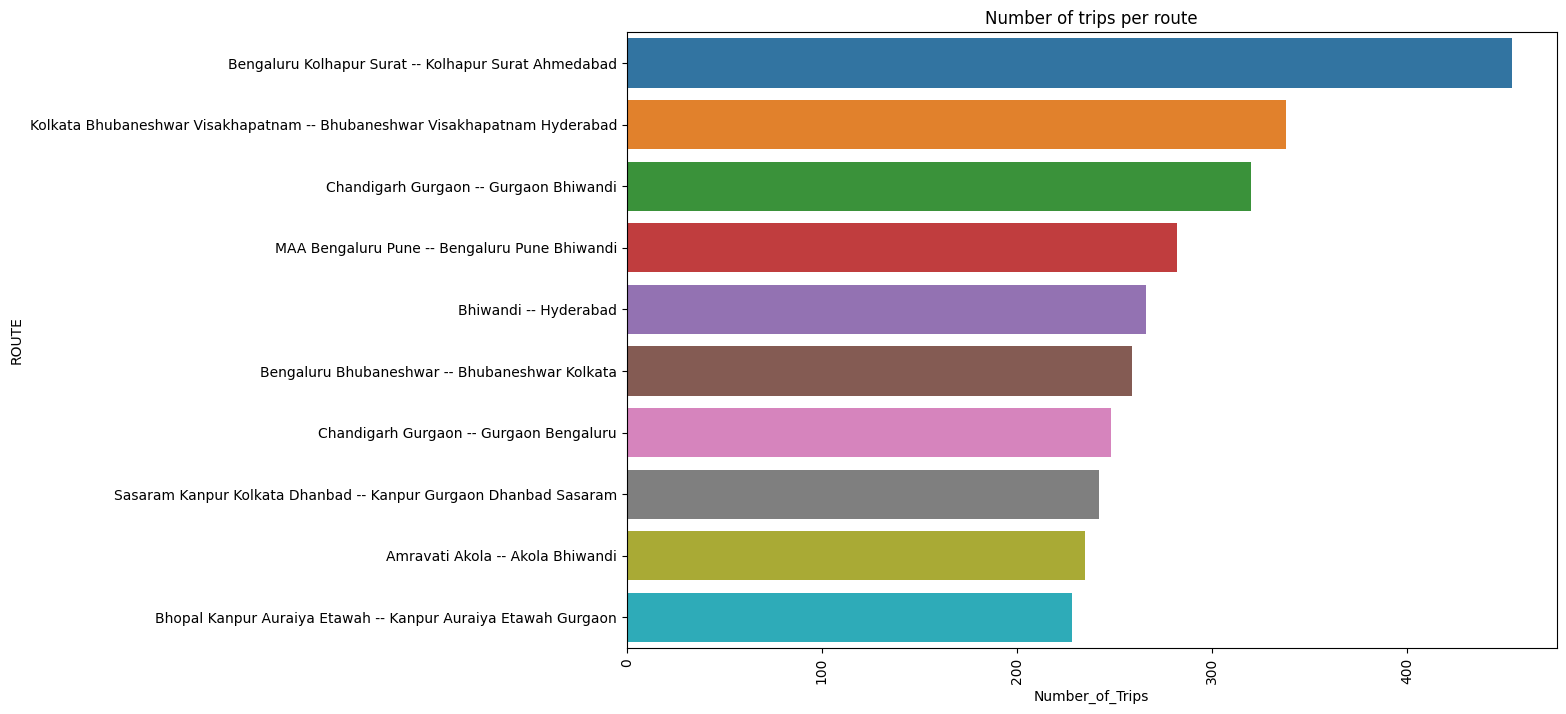

In [327]:
plt.figure(figsize=(12,8))

X = route_records[["ROUTE", "Number_of_Trips",
               ]].sort_values(by="Number_of_Trips",ascending=False).head(10)
sns.barplot(y = X["ROUTE"],
           x= X["Number_of_Trips"])
plt.title("Number of trips per route")
plt.xticks(rotation = 90)
plt.show()

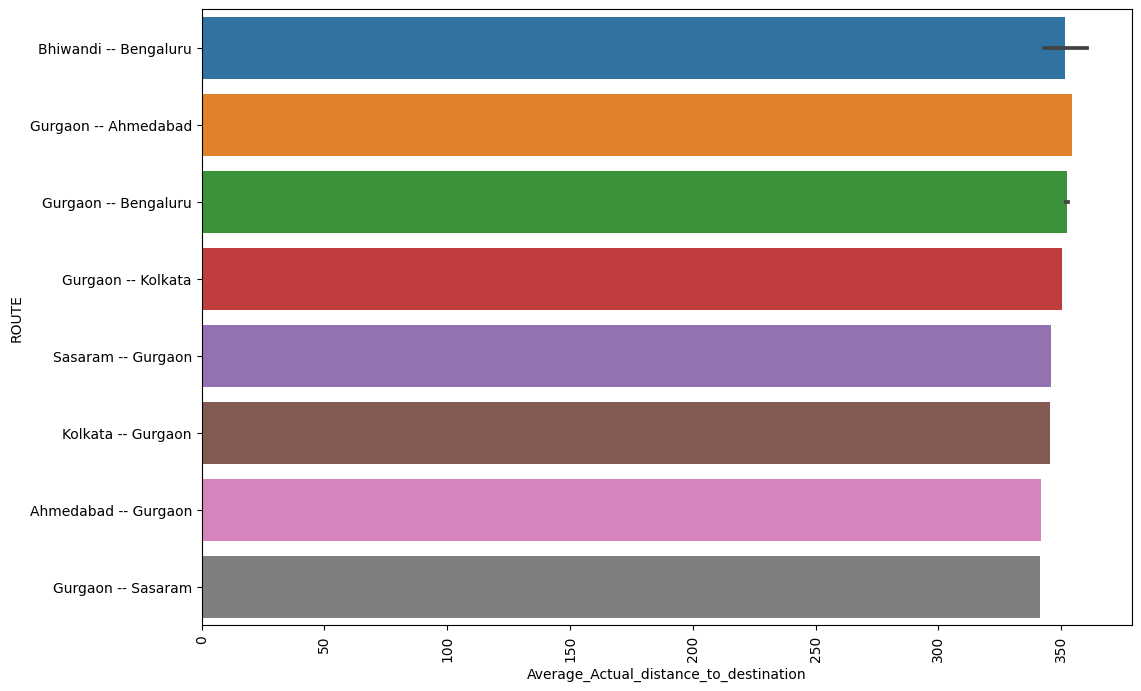

In [328]:
plt.figure(figsize=(12,8))

X = route_records[["ROUTE", "Average_Actual_distance_to_destination",
               ]].sort_values(by="Average_Actual_distance_to_destination",ascending=False).head(10)
sns.barplot(y = X["ROUTE"],
           x = X["Average_Actual_distance_to_destination"])
plt.xticks(rotation = 90)
plt.show()

In [329]:
Busiest_and_Longest_Routes  = route_records[(route_records["Average_Actual_distance_to_destination"] > route_records["Average_Actual_distance_to_destination"].quantile(0.75))
              & (route_records["Number_of_Trips"] > route_records["Number_of_Trips"].quantile(0.75))].sort_values(by="Average_Actual_distance_to_destination"
                                                                                                                  ,ascending=False)
Busiest_and_Longest_Routes_top25 = Busiest_and_Longest_Routes[["source_cities",
                                                               "destination_cities",
                                                               "Number_of_Trips",
                                                               "Average_Actual_distance_to_destination"]].head(25)
Busiest_and_Longest_Routes_top25

,source_cities,destination_cities,Number_of_Trips,Average_Actual_distance_to_destination
1068,Bhiwandi,Bengaluru,53.0,360.681747
1109,Gurgaon,Ahmedabad,201.0,354.506609
971,Gurgaon,Bengaluru,173.0,351.914768
564,Gurgaon,Kolkata,157.0,350.415455
592,Sasaram,Gurgaon,53.0,346.073493
1154,Kolkata,Gurgaon,49.0,345.666444
1082,Gurgaon,Sasaram,215.0,341.340742
662,Gurgaon,Bengaluru,188.0,340.364218
673,Pune,Bengaluru,112.0,338.251184
1196,Delhi,Bhiwandi,99.0,334.605899


**Routes : passing through maxinum number of cities :**

In [330]:
route_records[["SouceToDestination_city","Number_of_Trips",
               "Average_Actual_distance_to_destination",
               "#source_cities",
               "#destination_cities"]].sort_values(by=["#source_cities",
                                                       "#destination_cities",
                                                       "Number_of_Trips"]
                                                   ,ascending=False).head(25)

,SouceToDestination_city,Number_of_Trips,Average_Actual_distance_to_destination,#source_cities,#destination_cities
0,Guwahati TO Guwahati,78.0,66.872911,10,10
1,Guwahati TO Kokrajhar,71.0,58.062105,9,9
2,Mangalore TO Udupi,66.0,63.712949,9,9
3,Jaipur TO Didwana,57.0,66.295317,9,9
4,Ajmer TO Bijainagar,57.0,43.117386,8,7
9,Dausa TO Lalsot,225.0,30.335651,7,7
6,Hassan TO Koppa,114.0,31.031881,7,7
11,Pondicherry TO Pondicherry,76.0,49.829074,7,7
8,Mainpuri TO Mainpuri,54.0,33.654550,7,7
7,Mysore TO Mysore,50.0,25.759089,7,7


**Top 10 Longest Route as per : average actual time taken from one city to another city :**

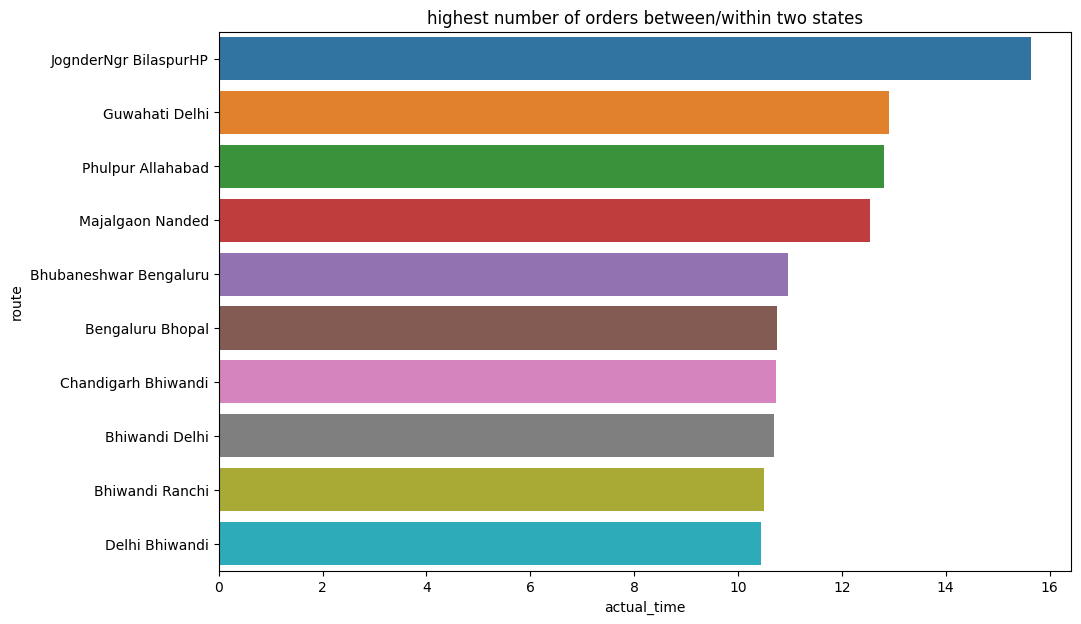

In [331]:
Longest_route_as_per_actual_trip_time = delhivery_data_new.groupby(["source_city",
                      "destination_city"])["actual_time"].mean().sort_values(ascending=False).head(10).reset_index()
Longest_route_as_per_actual_trip_time["route"] = Longest_route_as_per_actual_trip_time["source_city"] + " " + Longest_route_as_per_actual_trip_time["destination_city"]
Longest_route_as_per_actual_trip_time.drop(["source_city",
                                            "destination_city"],axis = 1,inplace=True)
Longest_route_as_per_actual_trip_time
plt.figure(figsize=(11,7))
sns.barplot(y = Longest_route_as_per_actual_trip_time["route"],
           x = Longest_route_as_per_actual_trip_time["actual_time"],)
plt.title("highest number of orders between/within two states")
plt.show()

**Highest number of Trips happening between/within two states :**

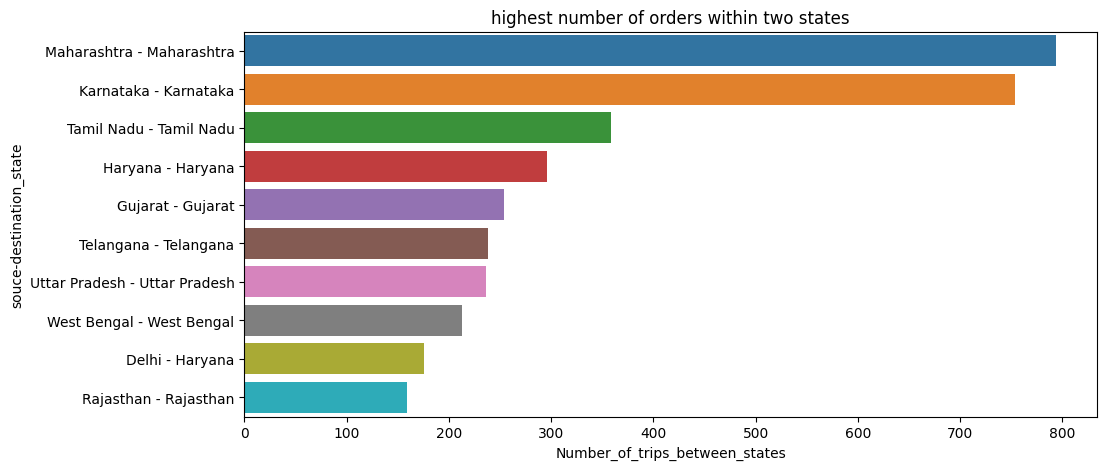

In [332]:
highest_order_between_states = delhivery_data.groupby(["source_state",
                                             "destination_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
highest_order_between_states  = highest_order_between_states.head(10)
highest_order_between_states["souce-destination"] = highest_order_between_states["source_state"] + " - " + highest_order_between_states["destination_state"]
highest_order_between_states.drop(["source_state","destination_state"],axis = 1, inplace=True)
highest_order_between_states.columns = ["Number_of_trips_between_states","souce-destination_state"]

plt.figure(figsize=(11,5))
sns.barplot(y = highest_order_between_states["souce-destination_state"],
           x = highest_order_between_states["Number_of_trips_between_states"],)
plt.title("highest number of orders within two states")
plt.show()

<ipython-input-333-203ae0c1d30f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOBS["souce-destination"] = HOBS["source_state"] + " - " + HOBS["destination_state"]
<ipython-input-333-203ae0c1d30f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOBS.drop(["source_state","destination_state"],axis = 1, inplace=True)


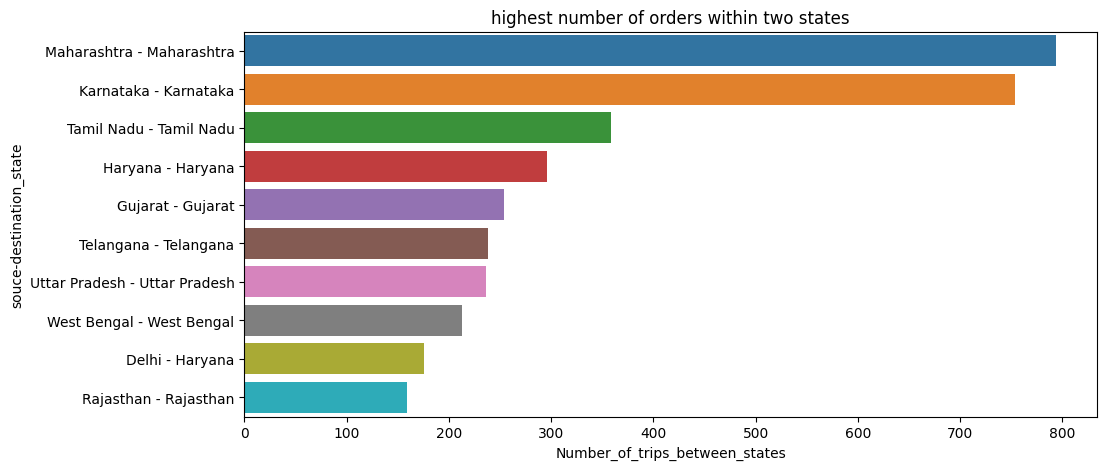

In [333]:
highest_order_between_states = delhivery_data.groupby(["source_state",
                                             "destination_state"])["trip_uuid"].nunique().sort_values(ascending=False).reset_index()
HOBS  = highest_order_between_states.head(10)
HOBS["souce-destination"] = HOBS["source_state"] + " - " + HOBS["destination_state"]
HOBS.drop(["source_state","destination_state"],axis = 1, inplace=True)
HOBS.columns = ["Number_of_trips_between_states","souce-destination_state"]

plt.figure(figsize=(11,5))
sns.barplot(y = HOBS["souce-destination_state"],
           x = HOBS["Number_of_trips_between_states"],)
plt.title("highest number of orders within two states")
plt.show()

> Within the state , Maharashtra , Karnataka, Tamil Nadu are some states having above 1000 trips.

> Delhi to Haryana is the busiest route, having more than 400 trips in between. Some of such busy routes are Haryana to Uttar Pradesh , Chandigarh to Punjab , Delhi to Uttar Pradesh .


**Top 10 warehouses with heavy traffic :**

In [334]:
destination_traffic = delhivery_data.groupby(["destination_city_state"])["trip_uuid"].nunique().reset_index()
source_traffic = delhivery_data.groupby(["source_city_state"])["trip_uuid"].nunique().reset_index()
transactions = source_traffic.merge(destination_traffic,
                               left_on="source_city_state"
                               ,right_on="destination_city_state")
transactions.columns = ["source_city_state","#Trips_s","destination_city_state","#Trips_d"]
transactions["TripsTraffic"] = transactions["#Trips_s"]+transactions["#Trips_d"]
transactions.drop(["#Trips_s","#Trips_d","destination_city_state"],axis = 1,inplace=True)
transactions.columns = ["Warehouse_City(Junction)","TripsTraffic"]

In [335]:
T = transactions.sort_values(by=["TripsTraffic"],ascending=False).head(10)

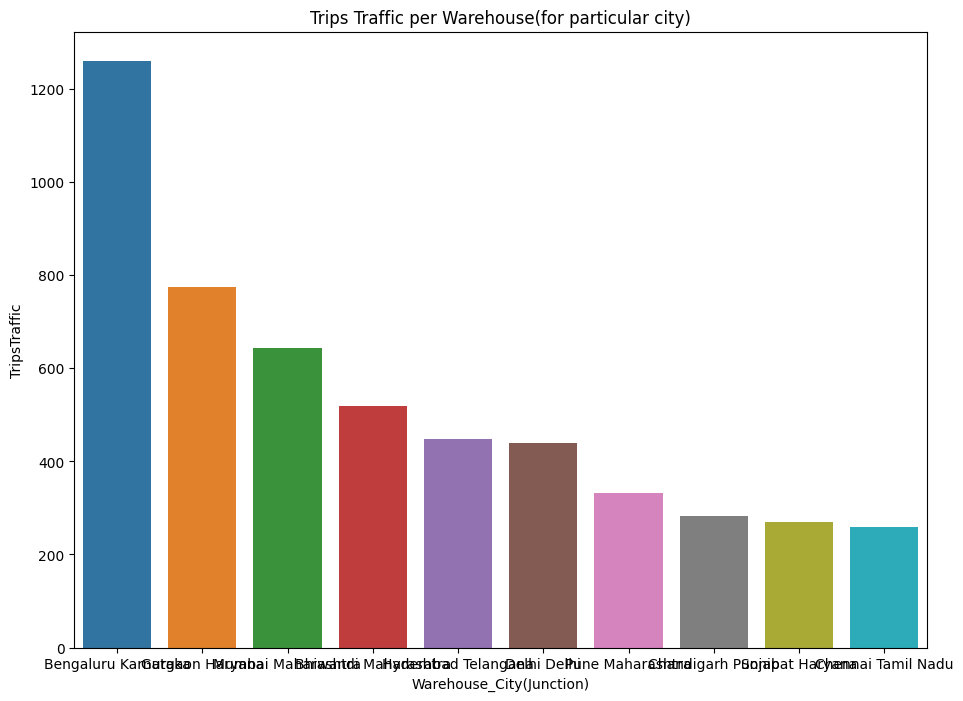

In [336]:
plt.figure(figsize=(11,8))
sns.barplot(y = T["TripsTraffic"],
           x = T["Warehouse_City(Junction)"])
plt.title("Trips Traffic per Warehouse(for particular city)")
plt.show()

In [337]:
delhivery_data.groupby(["source_state","destination_state"])["trip_uuid"].count().sort_values(ascending=False).head(10).reset_index()

,source_state,destination_state,trip_uuid
0,Karnataka,Karnataka,4130
1,Maharashtra,Maharashtra,3963
2,Tamil Nadu,Tamil Nadu,2251
3,Uttar Pradesh,Uttar Pradesh,1796
4,Haryana,Karnataka,1663
5,Haryana,Haryana,1663
6,Andhra Pradesh,Andhra Pradesh,1573
7,Gujarat,Gujarat,1545
8,Rajasthan,Rajasthan,1529
9,West Bengal,West Bengal,1359


# **Insights:**

1.  There are 1504 routes on which the trips are Delhivery trips are being done.

2. In the year 2018, 14817 trips have taken place in the month of September and October.

3.  Of the 14817 total different trips , around 60.12 % of  of the trip-routes are done on small vehicles i.e. Carting


4. Of the 14817 total different trips 39.9% of total trip-routes are FTL or  Full Truck Load

5.  We have 1508 unique source centers and 1481 unique destination centers



# **Recommendations**

1.  There is very less presence in Central, Eastern and North-Eastern region. Delhivery must ensure to merge with more companies/startups in order increase their presence in these regions.

2. Steps can be taken within the delivery chain to reduce the scanning time for stat and end scanning time, by automating delivery chain mechanism. Hence this will bring the scanning time much closer to the OSRM estimated delivery time

3. Also, for the deliveries within the city small vehicles (Carting) are more efficient hence, reducing the delivery time. However, for long distances the Trucks are preferred.

4.  Increasing the connectivity in tier 2 and tier 3 cities along with profession tie-ups with several e-commerce giants can increase the revenue as well as the reputation on connectivity across borders.

5. Since, Maharashtra and Karnataka have the most traffic hence, more no of resources can be planned for the cities in these states.



